In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scFunctions as sf
import scFates as scf
import palantir
import pickle


# Inital setting for plot size
from matplotlib import rcParams
FIGSIZE=(5,5)
rcParams['figure.figsize']=FIGSIZE

import warnings
warnings.filterwarnings('ignore')

sc.settings.verbosity = 3


%config Completer.use_jedi = False

## Préparation du jeu de données

In [2]:
adata = sc.read_h5ad("../data/MERGED_SEU_REANOTATE_V3.h5ad")
adata

AnnData object with n_obs × n_vars = 120860 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)'
    var: 'features'

In [3]:
cells_to_remove = "AV63_GM4G"

adata = adata[adata.obs['orig.ident'] != cells_to_remove, :].copy()
adata

AnnData object with n_obs × n_vars = 119630 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)'
    var: 'features'

In [4]:
adata.obs.loc[adata.obs["orig.ident"] == 'AV63_GM4D', "Stage"] = "Early_Stages"
adata.obs.loc[adata.obs["orig.ident"] == 'AV63_GM4D', "Stage"]


45p_GM4D_AAACCCACAGTTGGTT-1    Early_Stages
45p_GM4D_AAACCCATCGTTATCT-1    Early_Stages
45p_GM4D_AAACGAAAGGTTGTTC-1    Early_Stages
45p_GM4D_AAAGAACGTTGCTAGT-1    Early_Stages
45p_GM4D_AAAGGATAGTCGAAGC-1    Early_Stages
                                   ...     
45n_4D_TTTGACTCACATGTTG-1      Early_Stages
45n_4D_TTTGACTGTAGGAGTC-1      Early_Stages
45n_4D_TTTGACTTCACGTAGT-1      Early_Stages
45n_4D_TTTGATCTCGCGTGAC-1      Early_Stages
45n_4D_TTTGTTGAGAGTGGCT-1      Early_Stages
Name: Stage, Length: 1531, dtype: object

In [5]:
adata = sf.pp_PCA(adata) # Function defined in scFunctions.py

# Normalize, Log-transform, select HVG, scale data and perform PCA

normalizing counts per cell
    finished (0:00:03)
extracting highly variable genes
    finished (0:00:08)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:24)


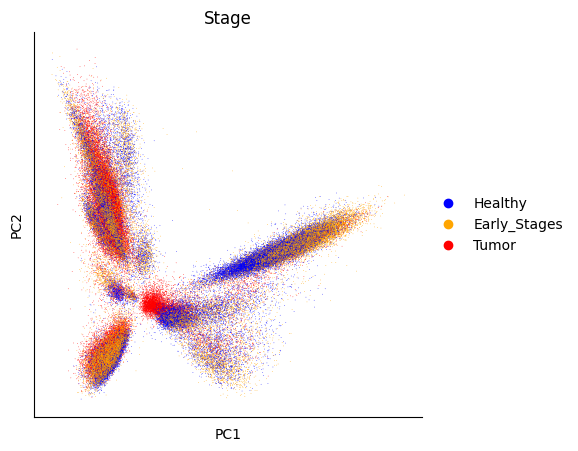

In [6]:
Stage=['Healthy','Early_Stages','Tumor']
adata.obs['Stage']=pd.Categorical(
    values=adata.obs.Stage, categories=Stage, ordered=True)

sc.pl.pca(adata, color = "Stage", palette={"Healthy" : "blue", "Early_Stages" : "orange", "Tumor" : "red"})

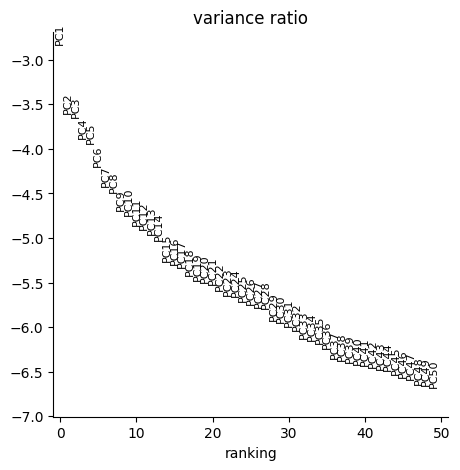

In [7]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50) #ndim = 50

In [8]:
sc.pp.neighbors(adata, n_pcs=50)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:30)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:47)


In [9]:
# Save adata 
# with open('../data/adata.pickle', 'wb') as f1:
#    pickle.dump(adata, f1)

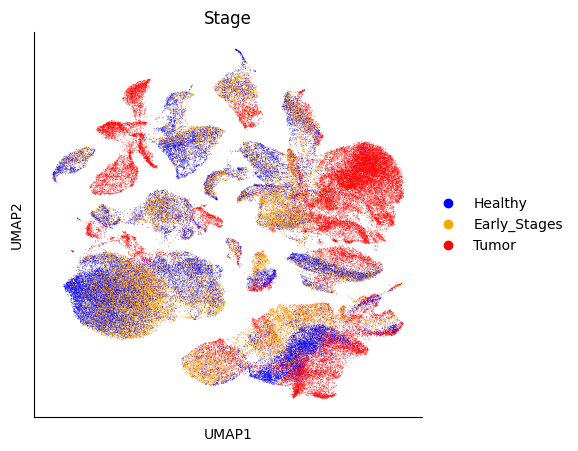

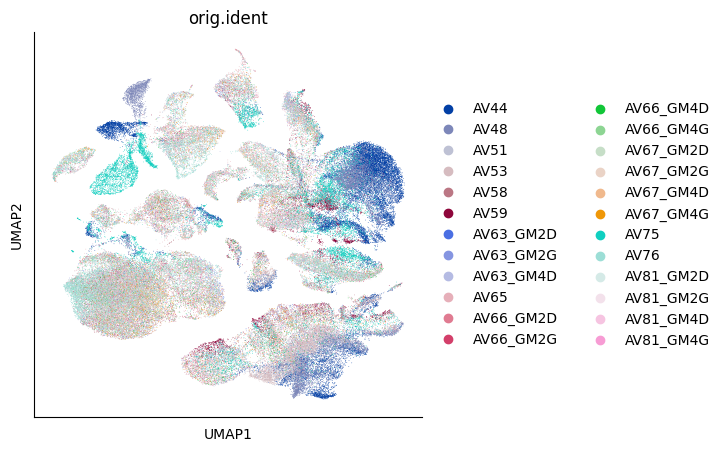

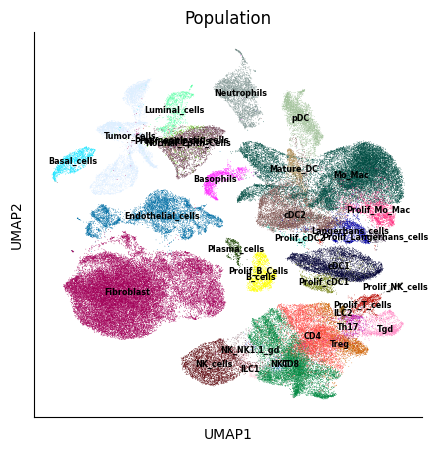

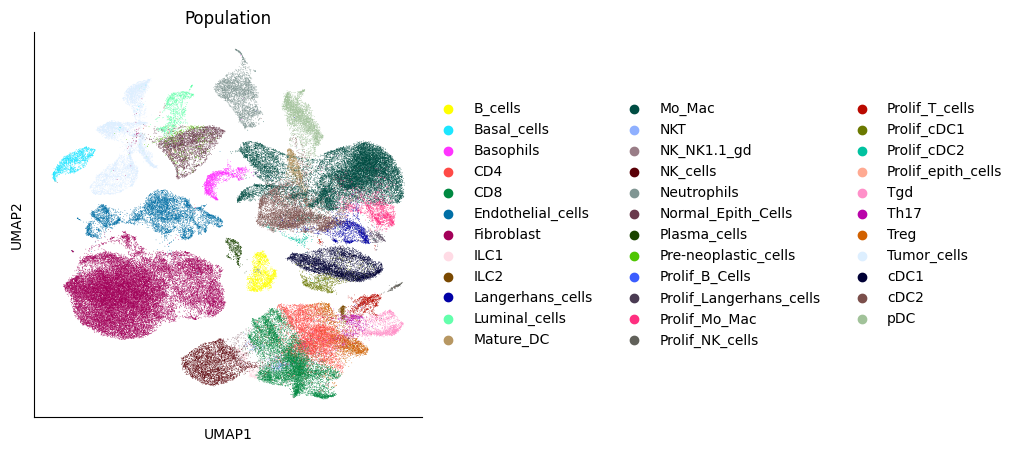

In [10]:
sc.pl.umap(adata, color = 'Stage')
sc.pl.umap(adata, color = "orig.ident")
sc.pl.umap(adata, color = "Population", legend_loc = "on data", legend_fontsize = "xx-small")
sc.pl.umap(adata, color = "Population")

In [11]:
list_epi = ["Normal_Epith_Cells", "Pre-neoplastic_cells", "Tumor_cells"]

adata_epi = adata[adata.obs['Population'].isin(list_epi), :].raw.to_adata().copy()
adata_epi

# 9743 cells

AnnData object with n_obs × n_vars = 9743 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'Stage_colors', 'neighbors', 'umap', 'orig.ident_colors', 'Population_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


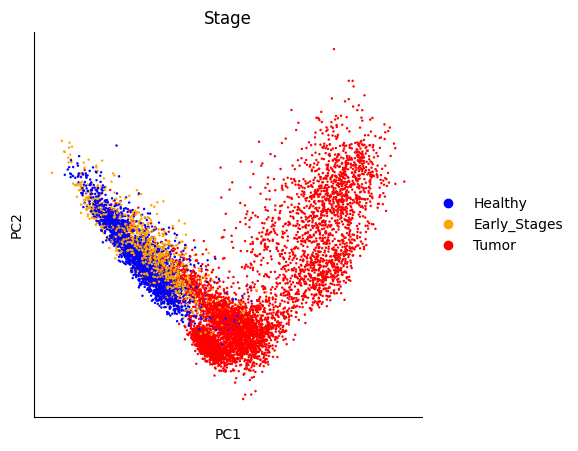

In [12]:
adata_epi = sf.pp_PCA(adata_epi) # Function defined in scFunctions.py

# Normalize, Log-transform, select HVG, scale data and perform PCA

sc.pl.pca(adata_epi, color = "Stage")

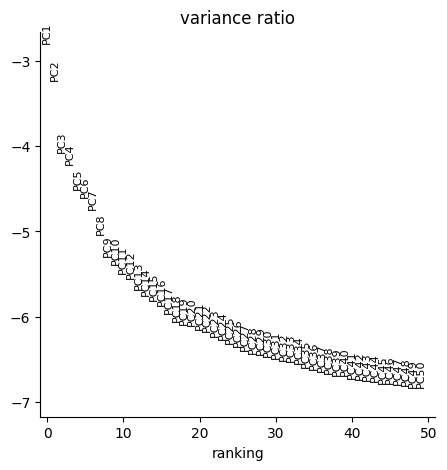

In [13]:
sc.pl.pca_variance_ratio(adata_epi, log=True, n_pcs = 50) #ndim = 30

In [14]:
sc.pp.neighbors(adata_epi, n_pcs=30)
sc.tl.umap(adata_epi)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


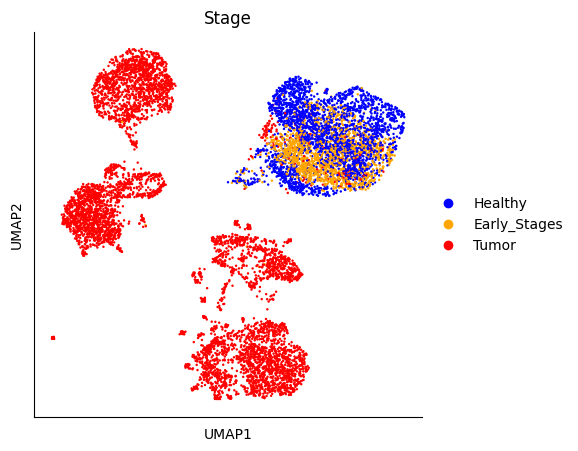

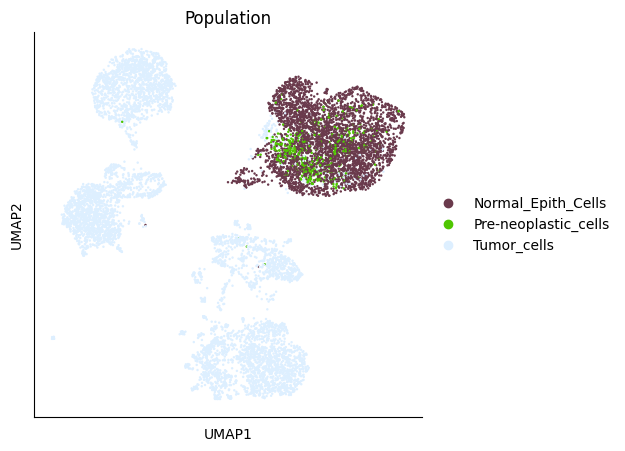

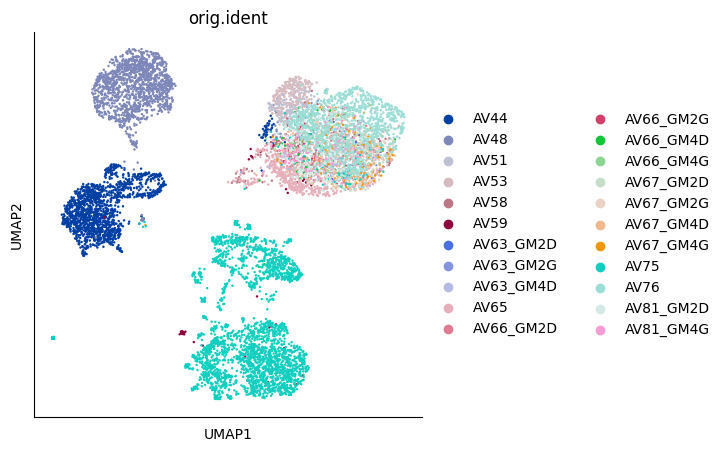

In [15]:
sc.pl.umap(adata_epi, color = 'Stage')
sc.pl.umap(adata_epi, color = 'Population')
sc.pl.umap(adata_epi, color = 'orig.ident')

### On va utiliser les H et ES pour selectionner les vrais ES

In [75]:
list_epi_H_ES = ["Normal_Epith_Cells", "Pre-neoplastic_cells"]

adata_epi_H_ES = adata_epi[adata_epi.obs['Population'].isin(list_epi_H_ES), :].raw.to_adata().copy()
adata_epi_H_ES


# 3884 cells

AnnData object with n_obs × n_vars = 3884 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)', 'Stage_old', 'has_cnv', 'cnv_group', 'S_score', 'G2M_score', 'phase', 'Stade', 'X_diffmap', 'Y_diffmap', 'new_orig', 't', 'seg', 'edge', 'milestones'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'Stage_colors', 'neighbors', 'umap', 'orig.ident_colors', 'Population_colors', 'draw_graph', 'diffmap_evals', 'Experiment_ID_colors', 'Stage_old_colors', 'cnv_group_colors', 'phase_colors', 'Stade_colors', 'graph', 'ppt', 'pseudotime_list', 'milestones_colors', 'dendro_segments', 'new_orig_colors'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa', 'X_diffmap', 'X_pca2d', 'X_palantir', 'X_R', 'X_dendro'
    obsp: 'distances', 'connectivities'

In [76]:
adata_epi_H_ES = sf.pp_PCA(adata_epi_H_ES) # Function defined in scFunctions.py

# Normalize, Log-transform, select HVG, scale data and perform PCA

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


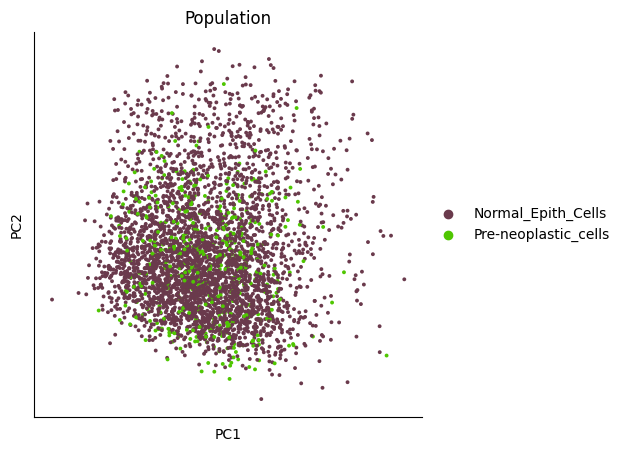

In [77]:
sc.pl.pca(adata_epi_H_ES, color = "Population")

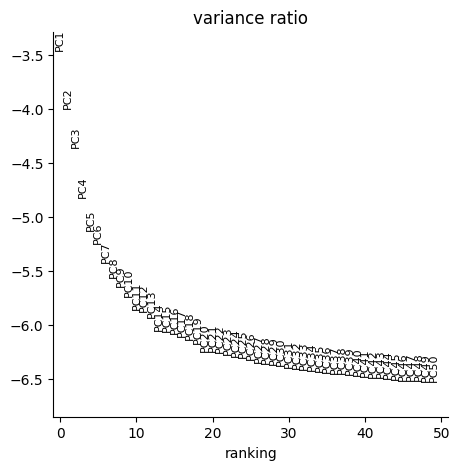

In [78]:
sc.pl.pca_variance_ratio(adata_epi_H_ES, log=True, n_pcs = 50) #ndim = 20

In [79]:
sc.pp.neighbors(adata_epi_H_ES, n_pcs=30)
sc.tl.umap(adata_epi_H_ES)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


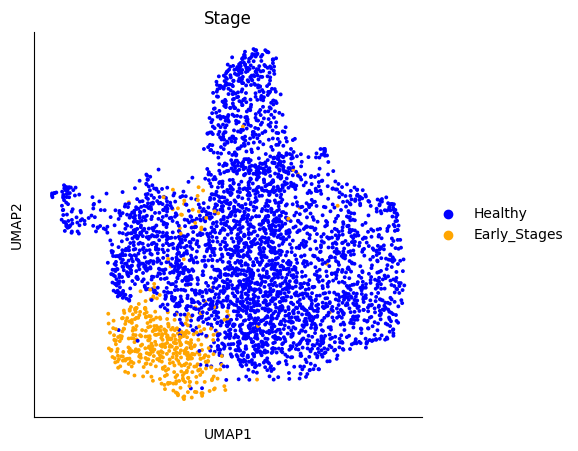

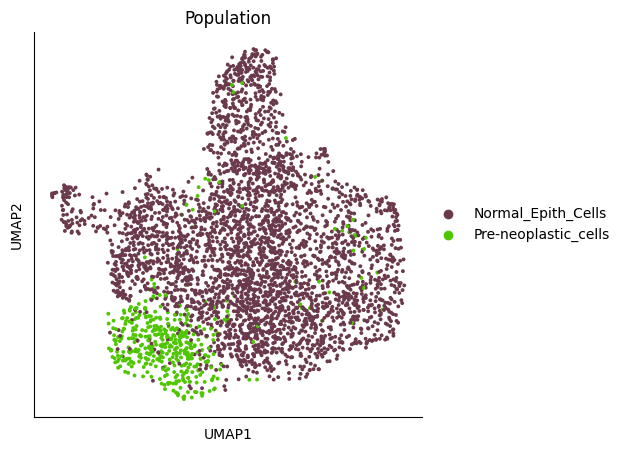

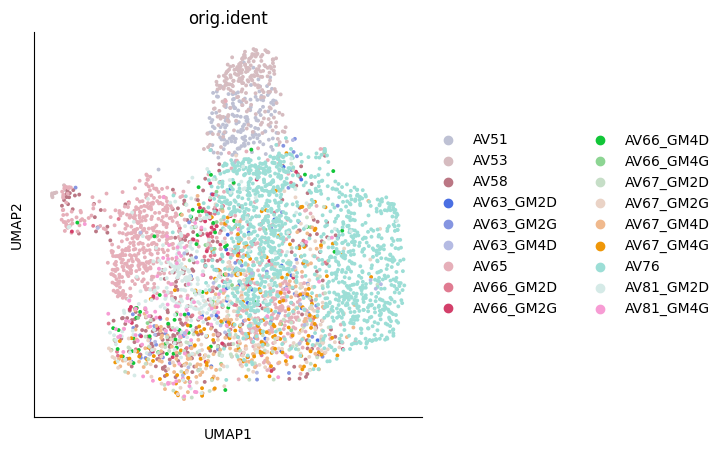

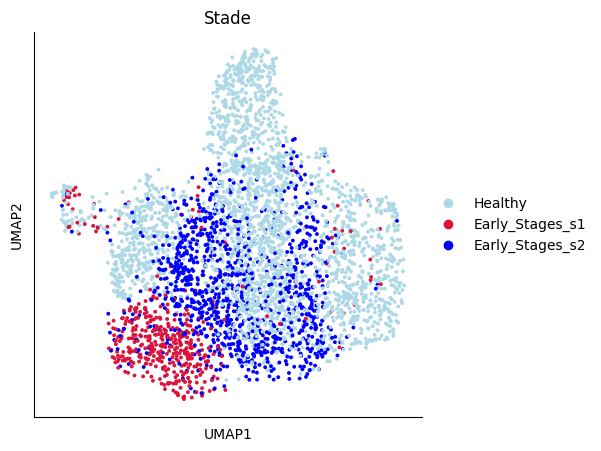

In [83]:
sc.pl.umap(adata_epi_H_ES, color = 'Stage')
sc.pl.umap(adata_epi_H_ES, color = 'Population')
sc.pl.umap(adata_epi_H_ES, color = 'orig.ident')
sc.pl.umap(adata_epi_H_ES, color = 'Stade')

In [88]:
sc.tl.leiden(adata_epi_H_ES, resolution = 0.4)

running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


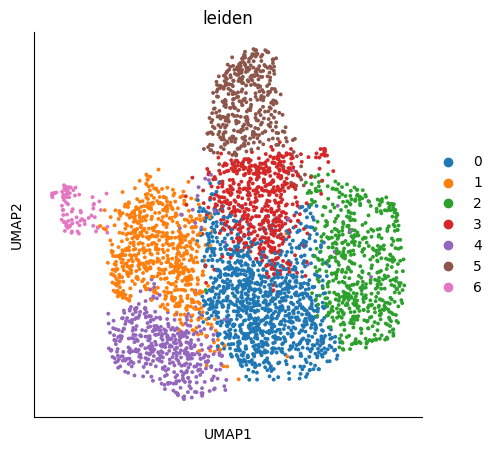

In [89]:
sc.pl.umap(adata_epi_H_ES, color = 'leiden')

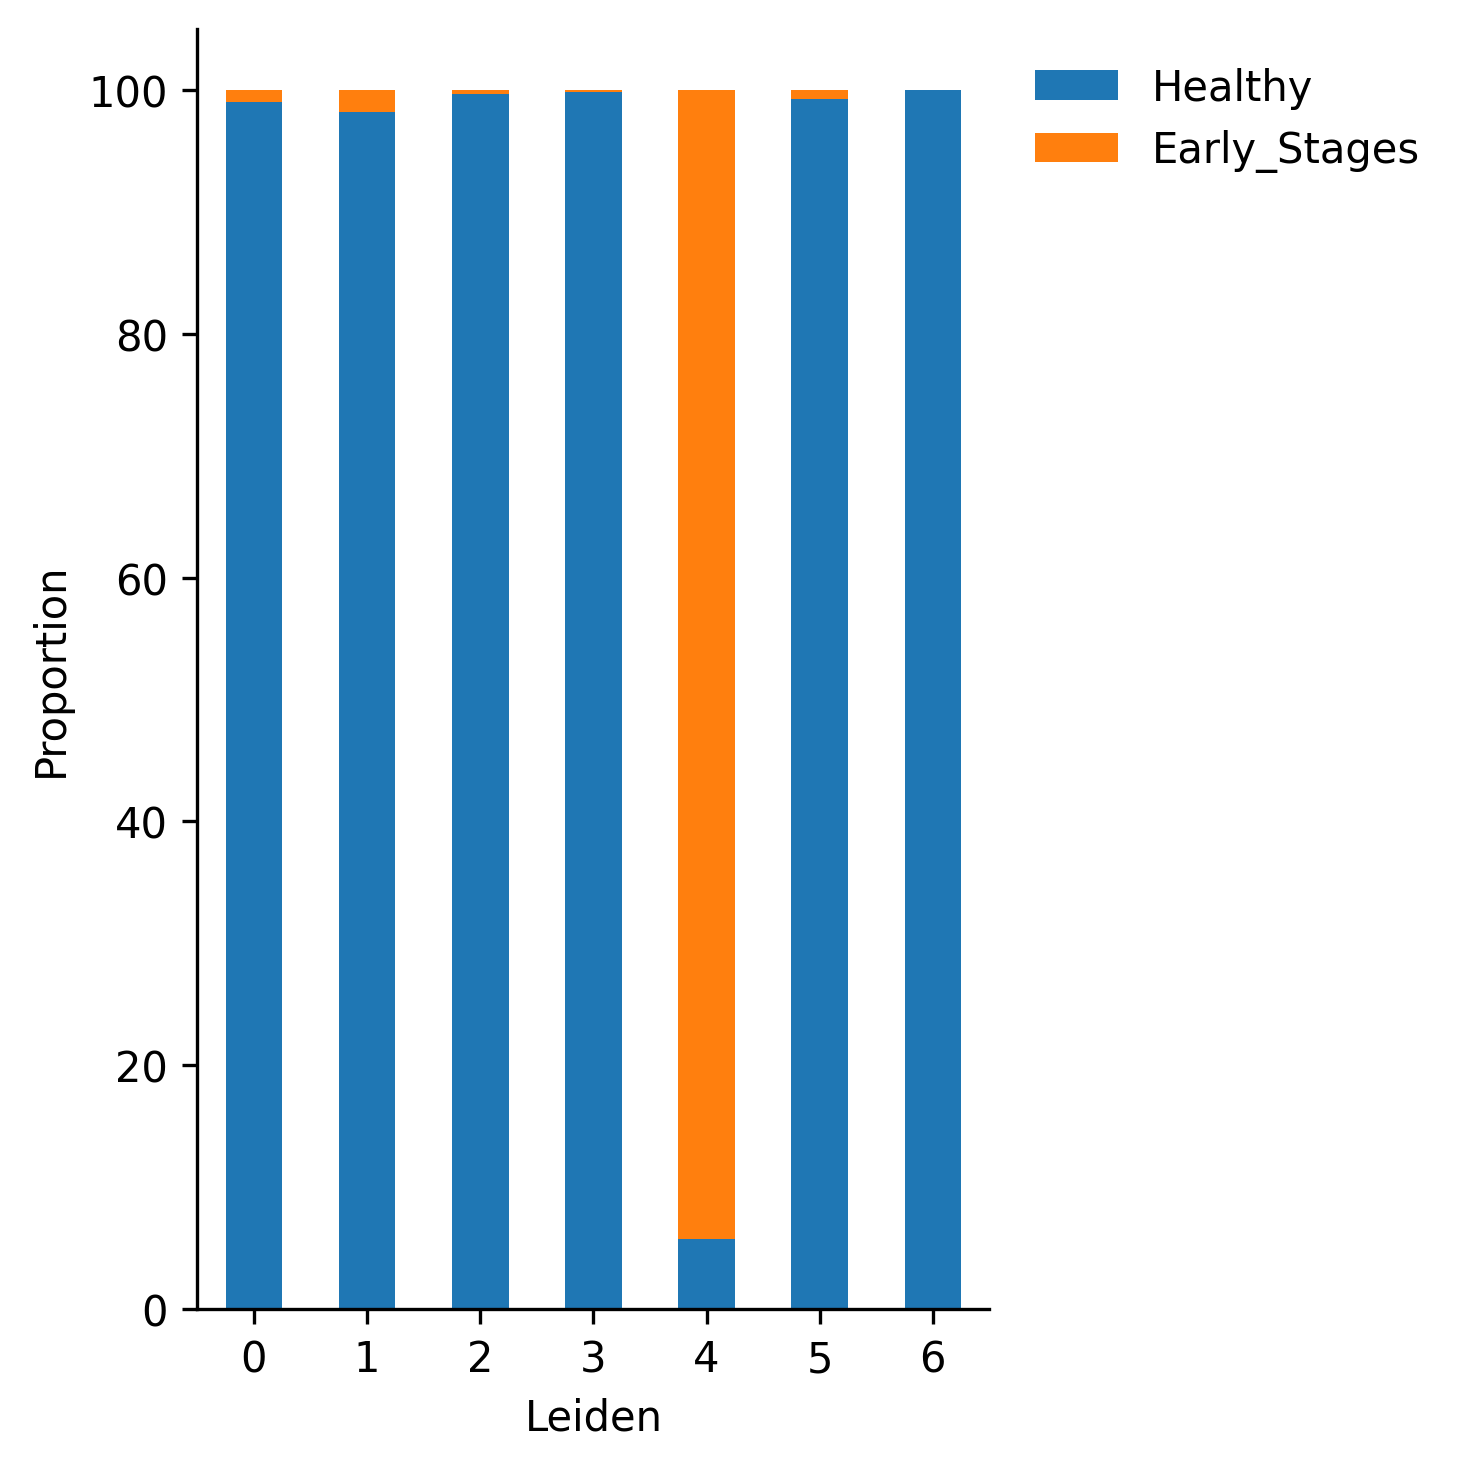

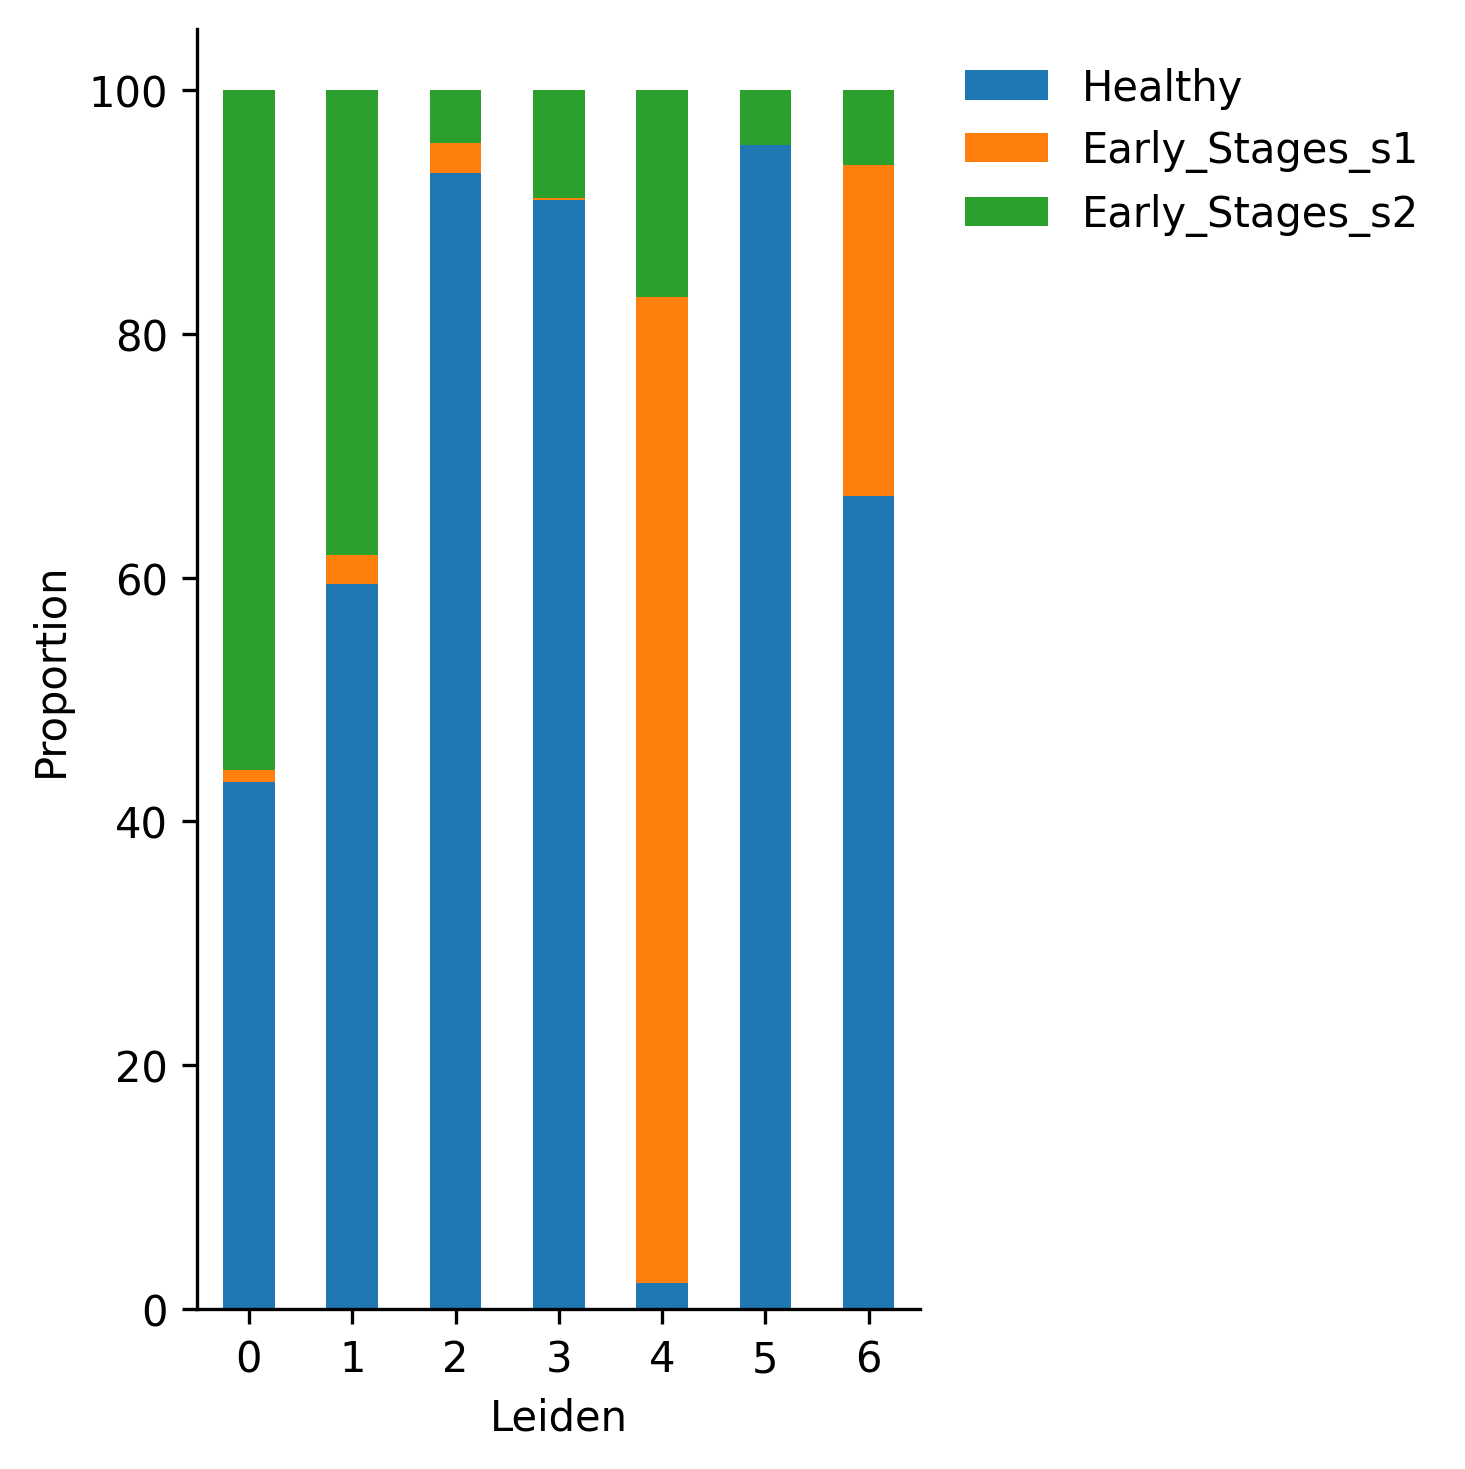

In [90]:
Stage_by_cluster = sf.get_cluster_proportions(adata_epi_H_ES, cluster_key="Stage", sample_key="leiden")
fig = sf.plot_cluster_proportions(Stage_by_cluster)

Stage_by_cluster = sf.get_cluster_proportions(adata_epi_H_ES, cluster_key="Stade", sample_key="leiden")
fig = sf.plot_cluster_proportions(Stage_by_cluster)

In [25]:
cluster_preneo = '4'

adata_epi_H_ES.obs.loc[adata_epi_H_ES.obs['leiden'] == cluster_preneo, "Stage"] = "Early_Stages"
adata_epi_H_ES.obs.loc[adata_epi_H_ES.obs['leiden'] != cluster_preneo, "Stage"] = "Healthy"
adata_epi_H_ES

AnnData object with n_obs × n_vars = 3884 × 2365
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)', 'leiden'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'Stage_colors', 'neighbors', 'umap', 'orig.ident_colors', 'Population_colors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

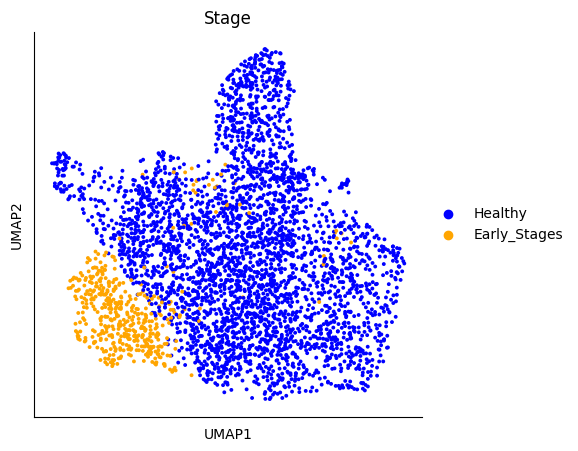

In [26]:
sc.pl.umap(adata_epi_H_ES, color = "Stage")

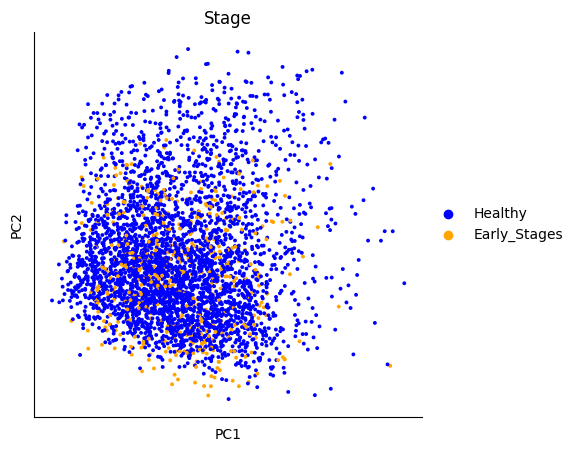

In [27]:
sc.pl.pca(adata_epi_H_ES, color = "Stage")

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9812618  0.9708124  0.9635256  0.9510262  0.9423778
     0.93393403 0.92865264 0.92321396 0.9130995  0.9024559  0.8985647
     0.89274335 0.88596    0.8833138 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


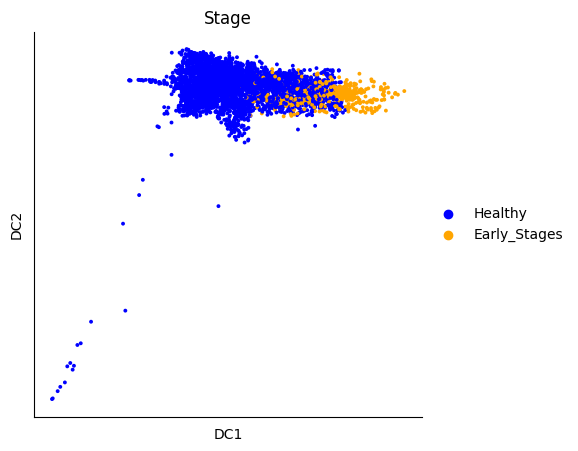

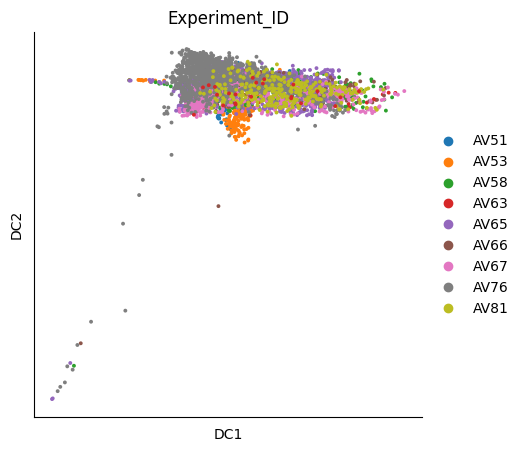

In [28]:
sc.tl.diffmap(adata_epi_H_ES)
adata_epi_H_ES.obsm["X_diffmap"] = adata_epi_H_ES.obsm["X_diffmap"][:,5:]
sc.pl.diffmap(adata_epi_H_ES, color = "Stage")
sc.pl.diffmap(adata_epi_H_ES, color = "Experiment_ID")

### On a une base pas trop mal

#### On va mettre cette annotation dans le jeu de données avec les cellules tumorales

In [29]:
cells_id = adata_epi_H_ES.obs.index.values
cells_id

array(['CD45pos_AGATCGTTCCCTCTAG-1_4', 'CD45pos_AGTAGTCCAATGTGGG-1_4',
       'CD45pos_CAGTGCGAGGGCTGAT-1_4', ..., '45p_GM4D_TCTACATGTCTATGAC-1',
       '45p_GM4D_TTACAGGGTGCTATTG-1', '45n_4D_TGTTGAGGTACTGTTG-1'],
      dtype=object)

In [30]:
for i in cells_id:
    adata_epi.obs.loc[i, "Stage"] = adata_epi_H_ES.obs.loc[i, "Stage"]

In [33]:
adata_epi.obs.to_csv("../data/adata_epi_metadata.csv")

In [ ]:
sc.pl.umap(adata_epi, color = "Stage")

In [ ]:
sc.tl.draw_graph(adata_epi)

In [ ]:
sc.pl.draw_graph(adata_epi, color = "Stage")
sc.pl.draw_graph(adata_epi, color = "orig.ident")
sc.pl.draw_graph(adata_epi, color = "Population")

**A voir avec les clusters CNV ce que ça donne mais les early sont bien intermédiaires**

In [ ]:
sc.tl.diffmap(adata_epi, n_comps = 20)
adata_epi.obsm["X_diffmap"] = adata_epi.obsm["X_diffmap"][:,1:]
sc.pl.diffmap(adata_epi, color = "Stage")
sc.pl.diffmap(adata_epi, color = "Experiment_ID")

**Certaines cellules normales semblent avoir un transcriptome plutôt prénéo, à voir comment expliquer ça mais sinon on a une jolie diffmap**

Je vais voir ce que ça donne avec l'ancienne annotation des stages

In [ ]:
# Recupere l'ID des cellules à modifier
cells_id = adata_epi.obs.index.values
cells_id

# Modifie les cellules
for i in cells_id:
    adata_epi.obs.loc[i, "Stage_old"] = adata.obs.loc[i, "Stage"]

In [ ]:
sc.pl.diffmap(adata_epi, color = "Stage")
sc.pl.diffmap(adata_epi, color = "Stage_old")

**Mauvais sens dommage**

Peut-être sur le draw_graph

In [ ]:
sc.pl.draw_graph(adata_epi, color = "Stage")
sc.pl.draw_graph(adata_epi, color = "Stage_old")

**Il semblerait que ce soit bien des cellules taguées normales mais qui présentent un transcriptome plutôt prénéo (Prolif ?)**

**Ce serait intéressant de voir les clusters de CNV pour voir si ces cellules appartiennent à un cluster plutôt prénéo**

In [ ]:
sc.pl.pca(adata_epi, color = "Stage")
sc.pl.pca(adata_epi, color = "Stage_old")

Sur l'ACP il semble qu'on vire beaucoup de faux Early avec la réannotation mais on perd forcemment en signal

In [ ]:
# Save adata without clusters
with open('../data/adata_epi.pickle', 'wb') as f1:
    pickle.dump(adata_epi, f1)

## Ajout des clusters CNV

In [2]:
#Load saved adata object
with open('../data/adata_epi.pickle', 'rb') as f1:
     adata_epi = pickle.load(f1)

In [3]:
df = pd.read_table("../data/infercnv.observation_groupings.txt", sep = " ", index_col = 0)
df.shape

(7423, 4)

In [4]:
adata_epi

AnnData object with n_obs × n_vars = 9743 × 2569
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)', 'Stage_old'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'Stage_colors', 'neighbors', 'umap', 'orig.ident_colors', 'Population_colors', 'draw_graph', 'diffmap_evals', 'Experiment_ID_colors', 'Stage_old_colors'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fa', 'X_diffmap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [5]:
cell_names = df.index
cell_names2 = adata_epi.obs.index

j = 0
for i in cell_names:
    if i not in cell_names2:
        j += 1

print(j)
# 56 cellules présentes chez margaux mais pas dans mon jeu de données


j = 0
for i in cell_names2:
    if i not in cell_names:
        j += 1

j

# 2376 cellules présentes chez moi mais pas dans le jeu de données de margaux

56


2376

In [6]:
liste_keep = []

for i in cell_names2:
    if i in cell_names:
        liste_keep.append(True)
    else:
        liste_keep.append(False)

liste_keep[0:5]

[True, True, True, True, True]

In [7]:
adata_epi.obs["has_cnv"] = liste_keep

In [8]:
liste_cnv = [df.loc[i, "Dendrogram Group"] if i in df.index else "Healthy" for i in adata_epi.obs.index]
adata_epi.obs["cnv_group"] = liste_cnv

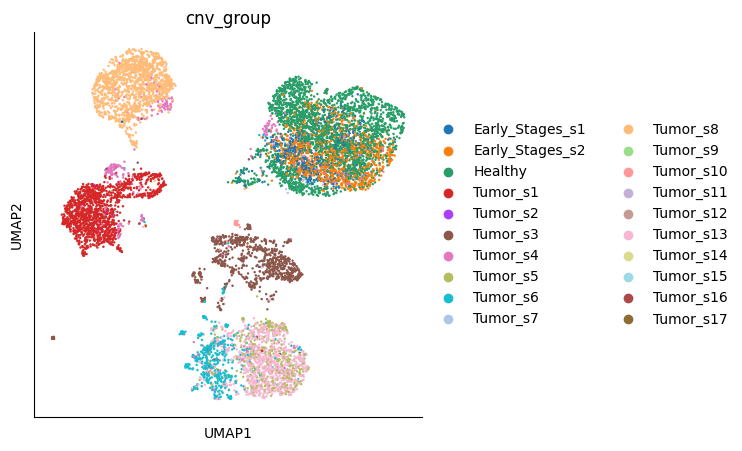

In [9]:
sc.pl.umap(adata_epi, color = 'cnv_group')

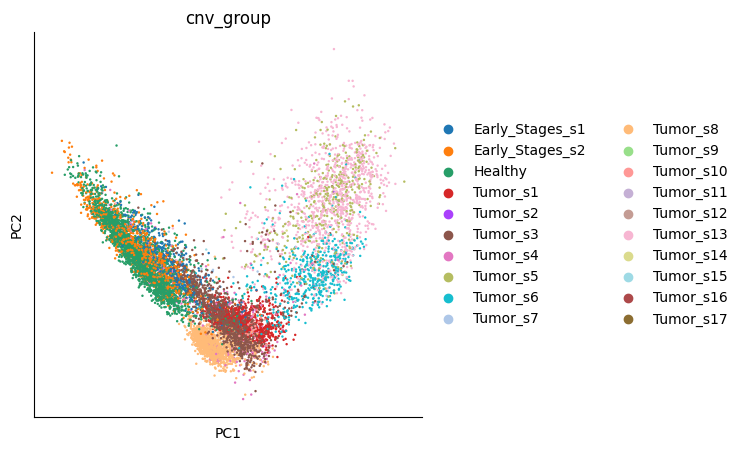

In [10]:
sc.pl.pca(adata_epi, color = 'cnv_group')

computing Diffusion Maps using n_comps=20(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9981217  0.99785775 0.995066   0.9947677  0.9925624
     0.9805631  0.98027873 0.9785218  0.9779066  0.9765135  0.97488964
     0.97247213 0.97036666 0.9667898  0.9662522  0.9648821  0.9598985
     0.95628095 0.954447  ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


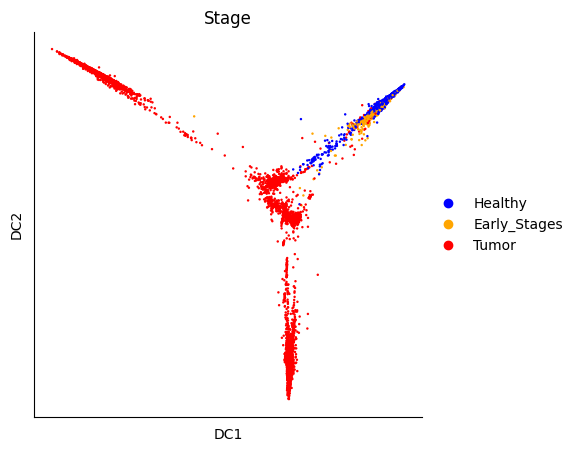

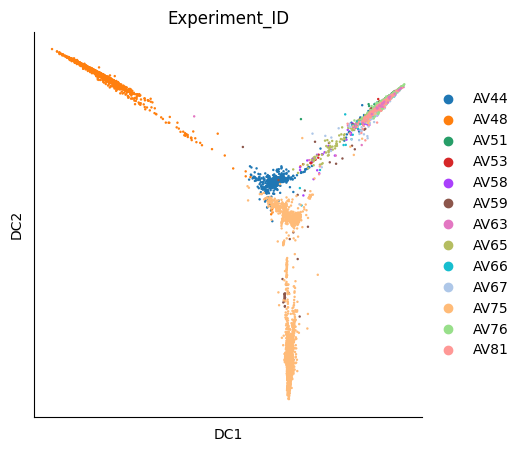

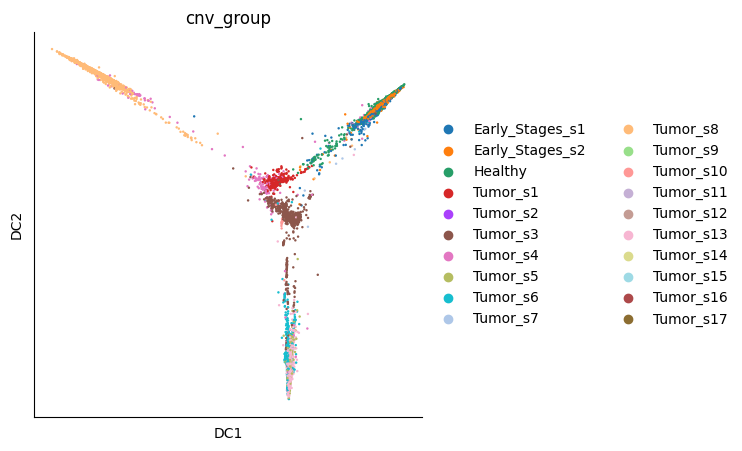

In [11]:
sc.tl.diffmap(adata_epi, n_comps = 20)
adata_epi.obsm["X_diffmap"] = adata_epi.obsm["X_diffmap"][:,1:]
sc.pl.diffmap(adata_epi, color = "Stage")
sc.pl.diffmap(adata_epi, color = "Experiment_ID")
sc.pl.diffmap(adata_epi, color = "cnv_group")

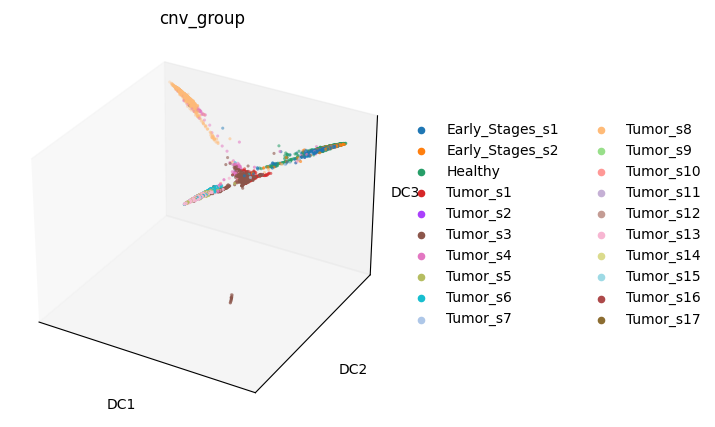

In [12]:
sc.pl.diffmap(adata_epi, color = "cnv_group", projection = "3d")

In [13]:
cell_cycle_genes = [x.strip().capitalize() for x in open('../data/regev_lab_cell_cycle_genes.txt')]

In [14]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata_epi.var_names]

In [15]:
sc.tl.score_genes_cell_cycle(adata_epi, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    428 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    554 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


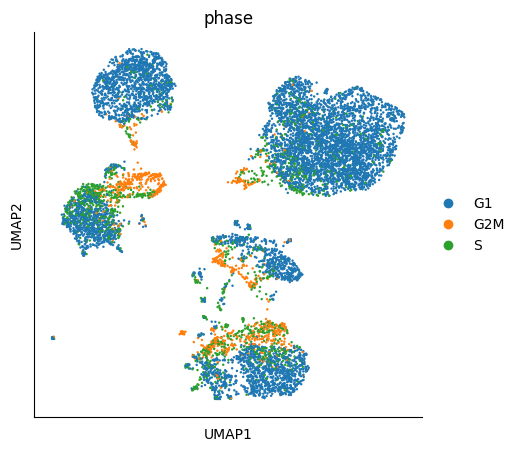

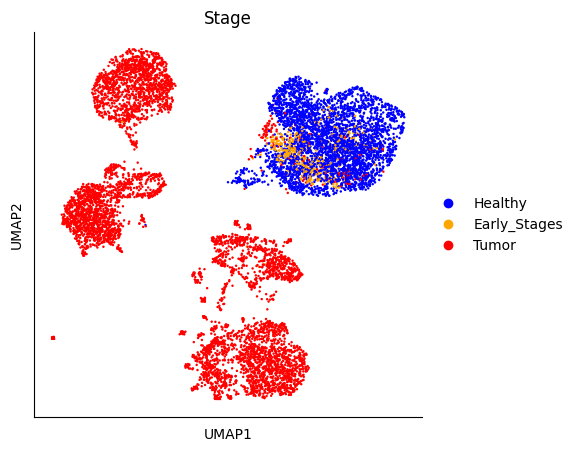

In [16]:
sc.pl.umap(adata_epi, color = "phase")
sc.pl.umap(adata_epi, color = "Stage")

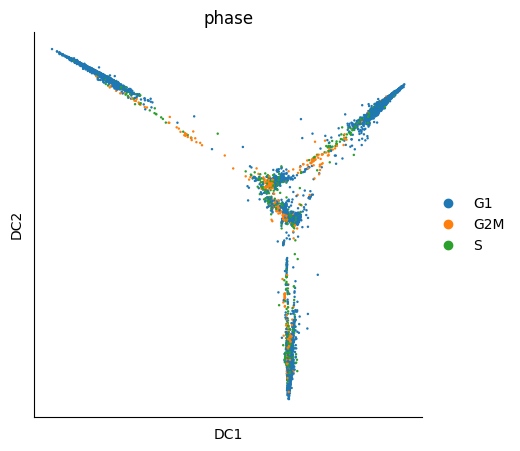

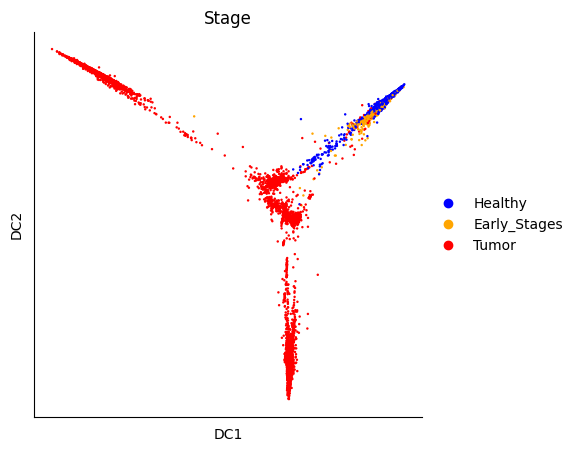

In [17]:
sc.pl.diffmap(adata_epi, color = "phase")
sc.pl.diffmap(adata_epi, color = "Stage")

Test regression

In [18]:
sc.pp.regress_out(adata_epi, ['S_score', 'G2M_score'])
sc.pp.scale(adata_epi)

regressing out ['S_score', 'G2M_score']
    finished (0:00:13)


In [19]:
sc.tl.pca(adata_epi)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


In [20]:
sc.pp.neighbors(adata_epi, n_pcs=30)
sc.tl.umap(adata_epi)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:19)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


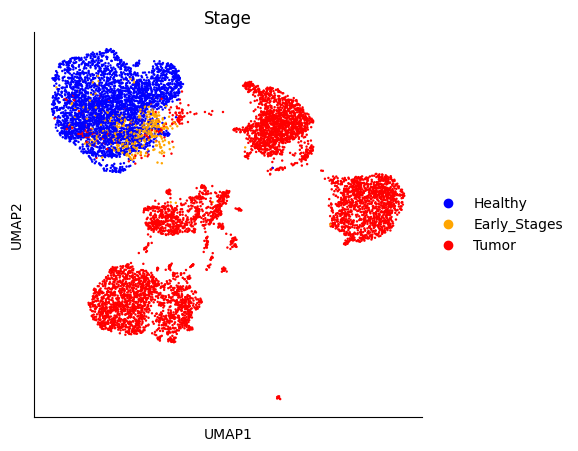

In [21]:
sc.pl.umap(adata_epi, color = 'Stage')

computing Diffusion Maps using n_comps=30(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99809086 0.9972888  0.9966528  0.99436516 0.9922481
     0.9799363  0.9781464  0.9760884  0.9759295  0.97397894 0.97072965
     0.9689879  0.9685136  0.9639867  0.96027243 0.9594551  0.95159316
     0.95079154 0.9495588  0.9474352  0.94630617 0.94602257 0.9443246
     0.9431606  0.9421713  0.94054323 0.9400427  0.9395387  0.93756384]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


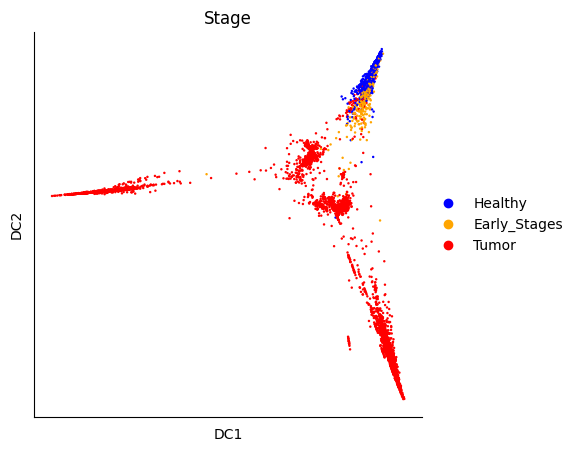

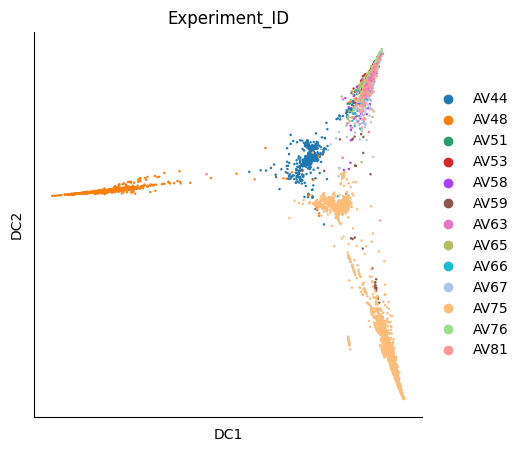

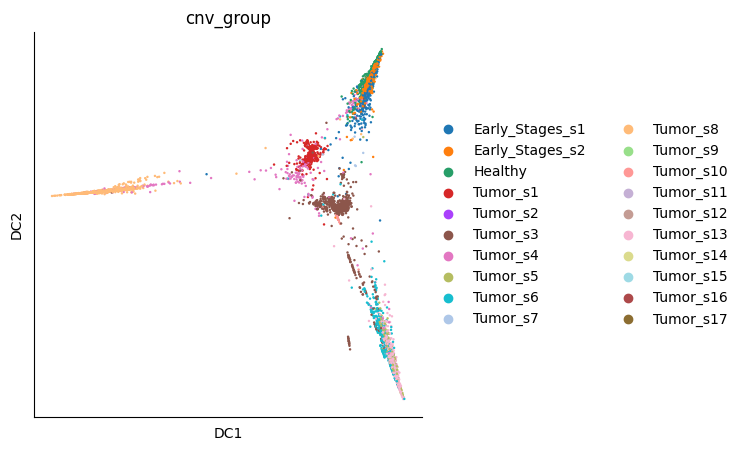

In [22]:
sc.tl.diffmap(adata_epi, n_comps = 30)
adata_epi.obsm["X_diffmap"] = adata_epi.obsm["X_diffmap"][:,1:]
sc.pl.diffmap(adata_epi, color = "Stage")
sc.pl.diffmap(adata_epi, color = "Experiment_ID")
sc.pl.diffmap(adata_epi, color = "cnv_group")

ça marche !!

test new annotation

In [23]:
liste_annot = []

for i in adata_epi.obs.index:
    if adata_epi.obs.loc[i, "cnv_group"].startswith("Tu"):
        liste_annot.append("Tumor")

    else:
        liste_annot.append(adata_epi.obs.loc[i, "cnv_group"])

adata_epi.obs["Stade"] = liste_annot


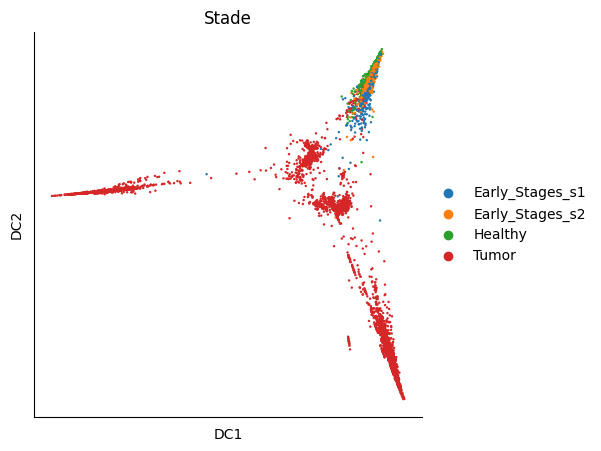

In [24]:
sc.pl.diffmap(adata_epi, color = "Stade")

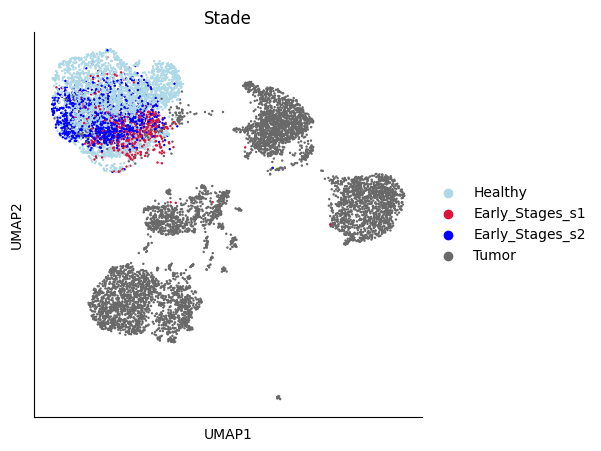

In [25]:
Stade=['Healthy','Early_Stages_s1', 'Early_Stages_s2','Tumor']
adata_epi.obs['Stade']=pd.Categorical(
    values=adata_epi.obs.Stade, categories=Stade, ordered=True)

sc.pl.umap(adata_epi, color = "Stade", palette={"Healthy" : "lightblue", "Early_Stages_s1" : "crimson", "Early_Stages_s2" : "blue", "Tumor" : "dimgray"})

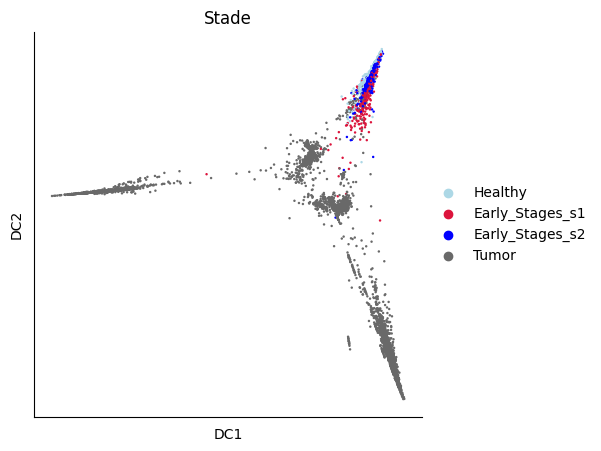

In [26]:
sc.pl.diffmap(adata_epi, color = "Stade")

In [27]:
#liste_Stade = [adata_epi.obs.loc[i, "Stade"] for i in adata_epi_H_ES.obs.index]


#adata_epi_H_ES.obs["Stade"] = liste_Stade

In [28]:
#Stade=['Healthy','Early_Stages_s1', 'Early_Stages_s2']
#adata_epi_H_ES.obs['Stade']=pd.Categorical(
#    values=adata_epi_H_ES.obs.Stade, categories=Stade, ordered=True)

#sc.pl.diffmap(adata_epi_H_ES, color = "Stade",
#             palette={"Healthy" : "lightblue", "Early_Stages_s1" : "red", "Early_Stages_s2" : "blue"})

In [29]:
#sc.pl.umap(adata_epi_H_ES, color = 'Stade')

In [30]:
#sc.tl.diffmap(adata_epi_H_ES)
#adata_epi_H_ES.obsm["X_diffmap"] = adata_epi_H_ES.obsm["X_diffmap"][:,5:]
#sc.pl.diffmap(adata_epi_H_ES, color = "Stade")

In [31]:
test = list(zip(adata_epi.obs.Stage, adata_epi.obs.Stade))

In [32]:
list(set(test))

[('Tumor', 'Tumor'),
 ('Healthy', 'Early_Stages_s1'),
 ('Early_Stages', 'Early_Stages_s2'),
 ('Healthy', 'Early_Stages_s2'),
 ('Early_Stages', 'Healthy'),
 ('Healthy', 'Healthy'),
 ('Early_Stages', 'Early_Stages_s1')]

In [33]:
adata_epi.obsm["X_pca2d"]=adata_epi.obsm["X_pca"][:,:2]
sc.tl.draw_graph(adata_epi,init_pos='X_pca2d')

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:01)


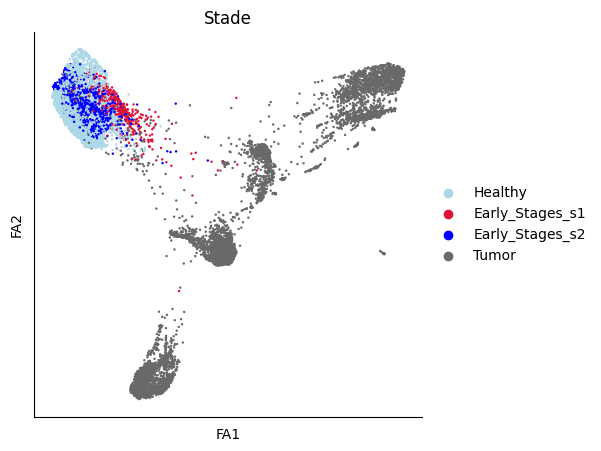

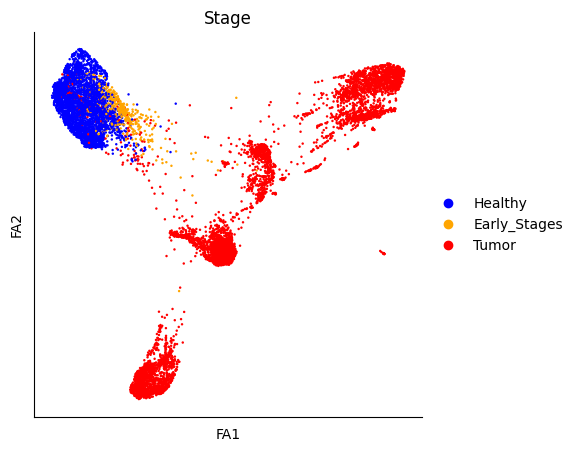

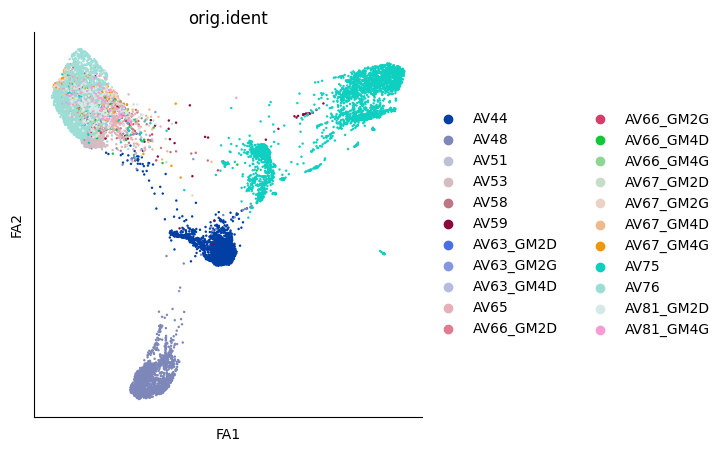

In [34]:
sc.pl.draw_graph(adata_epi, color = "Stade")
sc.pl.draw_graph(adata_epi, color = "Stage")
sc.pl.draw_graph(adata_epi, color = "orig.ident")

## Base trouvée

computing neighbors
    using 'X_pca' with n_pcs = 6
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99937314 0.9992133  0.99807    0.99756557 0.9965583
     0.9950785  0.99497104 0.9944645  0.9939567  0.991762   0.99083906
     0.98975384 0.9891255  0.9877362 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


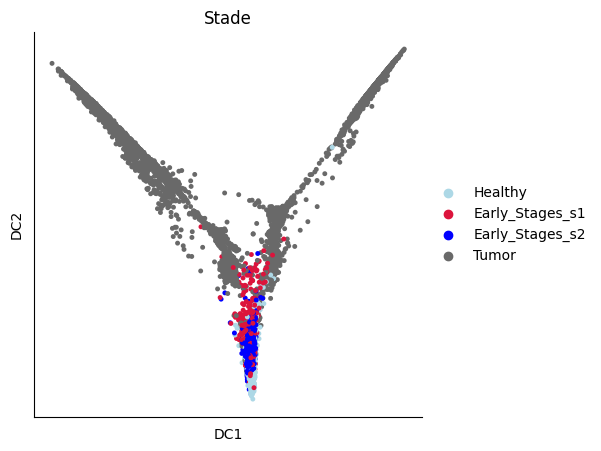

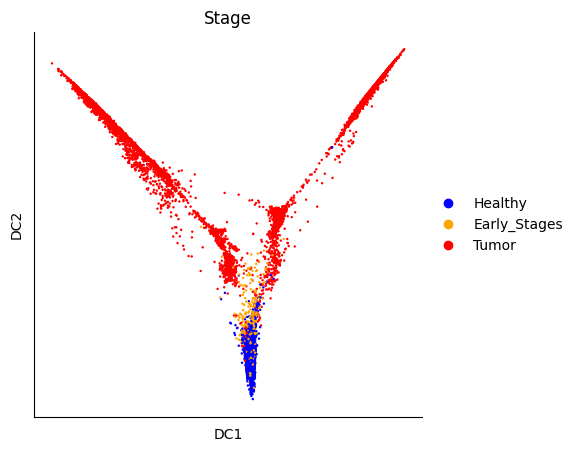

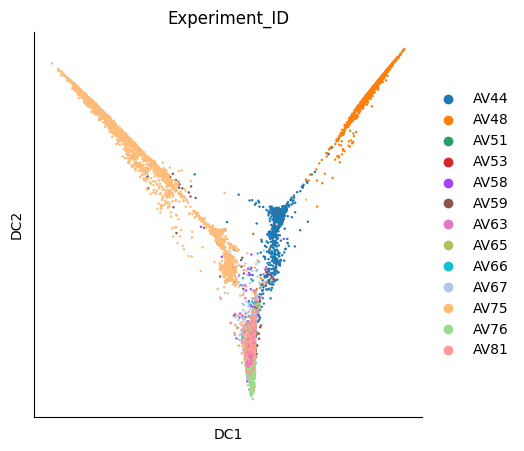

In [35]:
sc.pp.neighbors(adata_epi, n_pcs = 6, n_neighbors=5)
sc.tl.diffmap(adata_epi)
adata_epi.obsm["X_diffmap"] = adata_epi.obsm["X_diffmap"][:,1:]
sc.pl.diffmap(adata_epi, color = "Stade")
sc.pl.diffmap(adata_epi, color = "Stage")
sc.pl.diffmap(adata_epi, color = "Experiment_ID")


#n_pcs = 6, n_neighbors = 5

In [36]:
X_diffmap = adata_epi.obsm["X_diffmap"][:,0]
Y_diffmap = adata_epi.obsm["X_diffmap"][:,1]

adata_epi.obs["X_diffmap"] = X_diffmap
adata_epi.obs["Y_diffmap"] = Y_diffmap

In [37]:
stade_colors = {"Healthy" : "lightblue", "Early_Stages_s1" : "crimson", "Early_Stages_s2" : "blue", "Tumor" : "dimgray"}

<AxesSubplot: xlabel='X_diffmap', ylabel='Y_diffmap'>

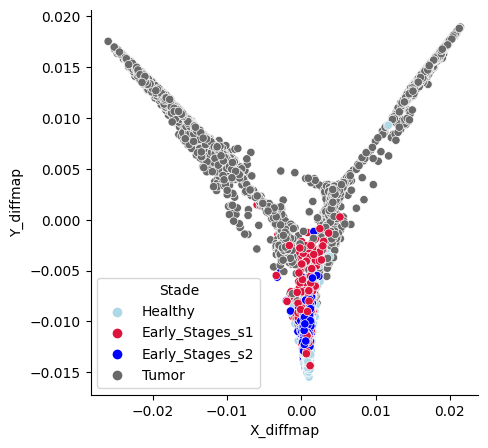

In [38]:
sns.scatterplot(adata_epi.obs, x = "X_diffmap", 
                y = "Y_diffmap", 
                hue = "Stade", 
               palette = stade_colors)

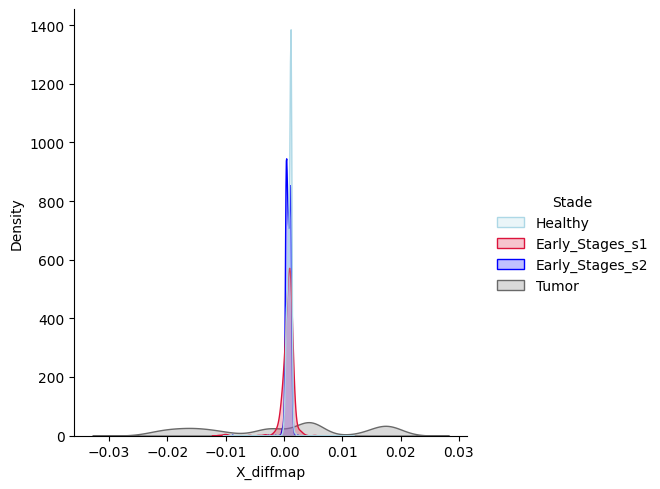

In [39]:
sns.displot(adata_epi.obs, x="X_diffmap", hue = "Stade", kind = "kde", palette = stade_colors, fill = True, common_norm=False)

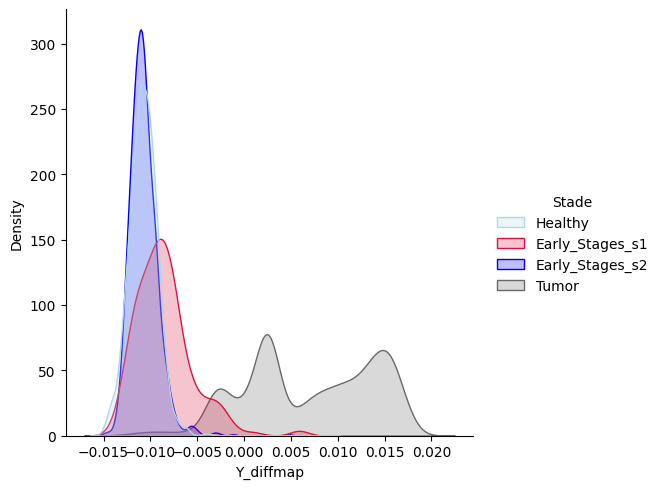

In [40]:
sns.displot(adata_epi.obs, x="Y_diffmap", hue = "Stade", kind = "kde", palette = stade_colors, fill = True, common_norm=False)

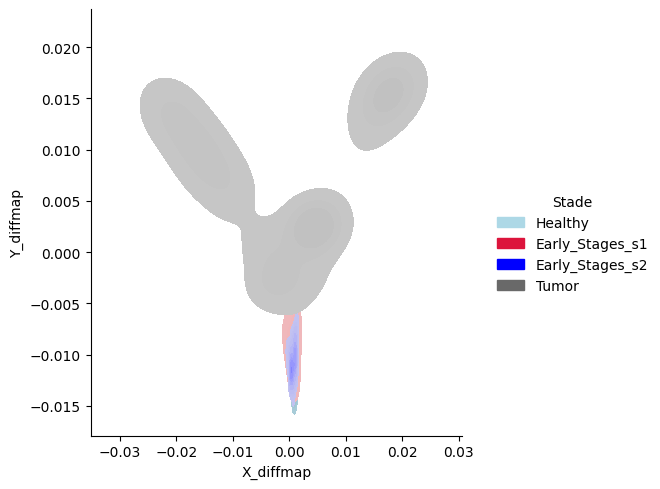

In [41]:
sns.displot(adata_epi.obs, x="X_diffmap", y='Y_diffmap', 
            hue = "Stade", 
            kind = "kde", 
            palette = stade_colors, 
            fill = True)

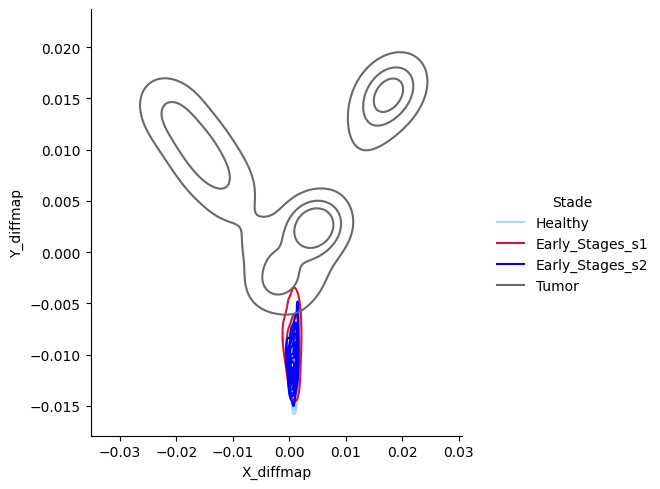

In [42]:
sns.displot(adata_epi.obs, x="X_diffmap", y='Y_diffmap', hue = "Stade", kind = "kde", palette = stade_colors)

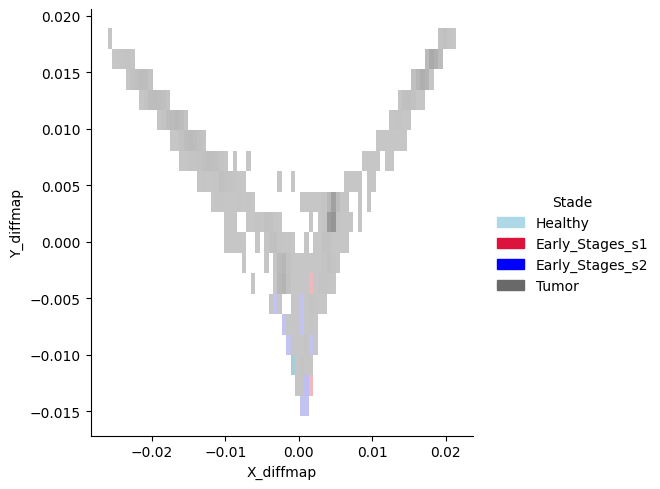

In [43]:
sns.displot(adata_epi.obs, x="X_diffmap", y='Y_diffmap', hue = "Stade", palette = stade_colors)

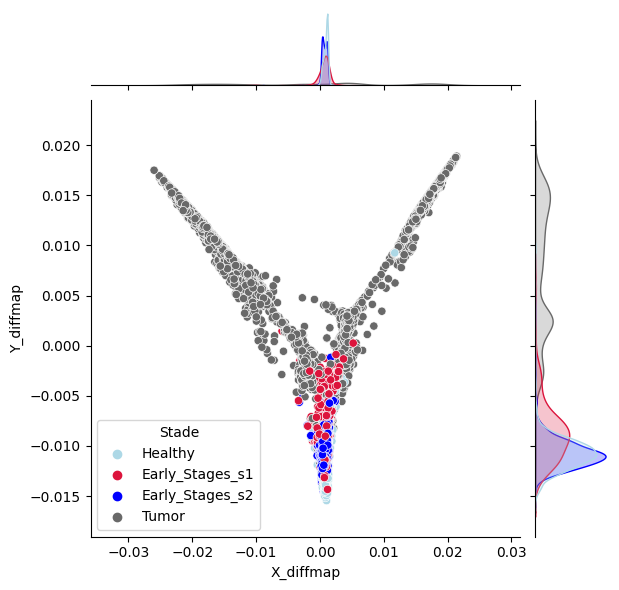

In [44]:
sns.jointplot(adata_epi.obs, x="X_diffmap", y='Y_diffmap', hue = "Stade", palette = stade_colors, marginal_kws={'common_norm':False})

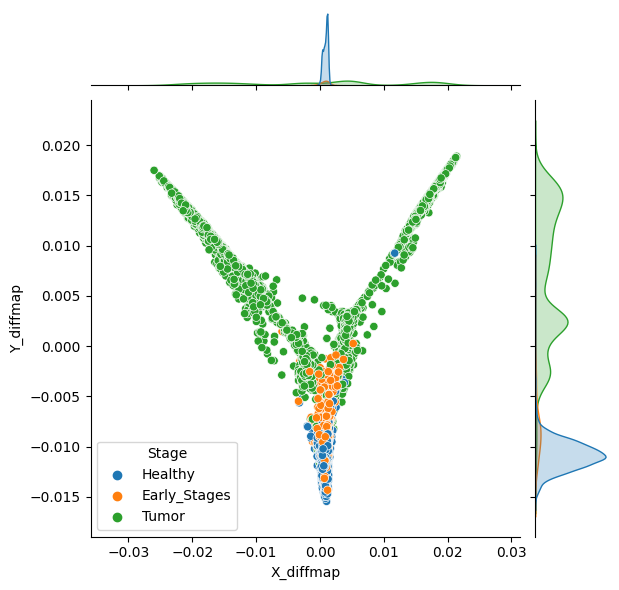

In [45]:
sns.jointplot(adata_epi.obs, x="X_diffmap", y='Y_diffmap', hue = "Stage")

### Sans les tumeurs

In [46]:
#X_diffmap = adata_epi_H_ES.obsm["X_diffmap"][:,0]
#Y_diffmap = adata_epi_H_ES.obsm["X_diffmap"][:,1]

#adata_epi_H_ES.obs["X_diffmap"] = X_diffmap
#adata_epi_H_ES.obs["Y_diffmap"] = Y_diffmap

In [47]:
#sns.displot(adata_epi_H_ES.obs, x="X_diffmap", hue = "Stade", kind = "kde", palette = stade_colors, fill = True, common_norm=False)

# ScFAtes

In [48]:
with open("../data/adata_epi_new_orig.pickle", "rb") as f1:
    a = pickle.load(f1)

adata_epi.obs["new_orig"] = a.obs["new_orig"]

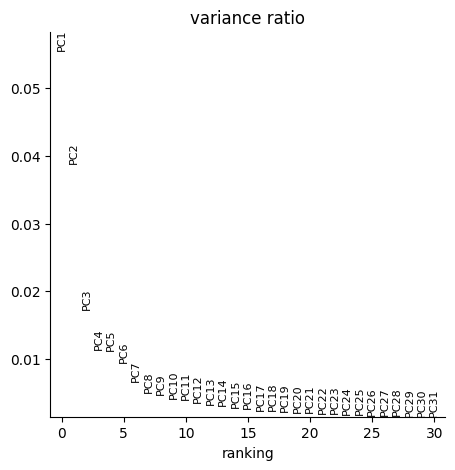

In [49]:
sc.pl.pca_variance_ratio(adata_epi)

In [50]:
import palantir

pca_projections = pd.DataFrame(adata_epi.obsm["X_pca"],index=adata_epi.obs_names)

dm_res = palantir.utils.run_diffusion_maps(pca_projections)
ms_data = palantir.utils.determine_multiscale_space(dm_res)

# generate neighbor draph in multiscale diffusion space
adata_epi.obsm["X_palantir"]=ms_data.values
sc.pp.neighbors(adata_epi, use_rep="X_palantir")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:51)


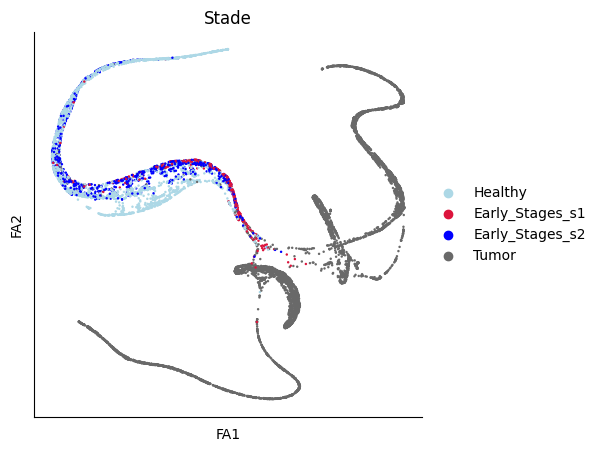

In [51]:
sc.tl.draw_graph(adata_epi,init_pos='X_pca')
sc.pl.draw_graph(adata_epi,color = "Stade")

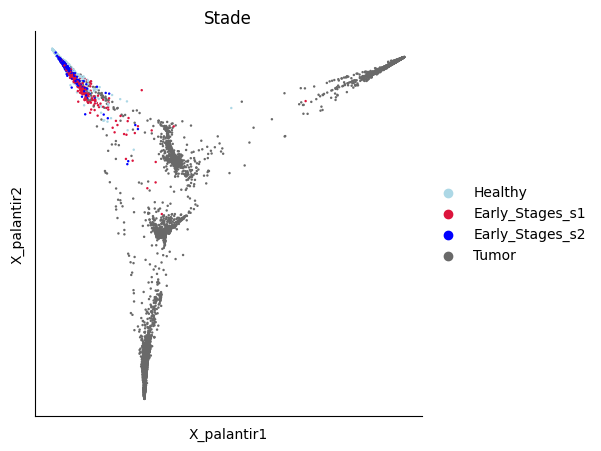

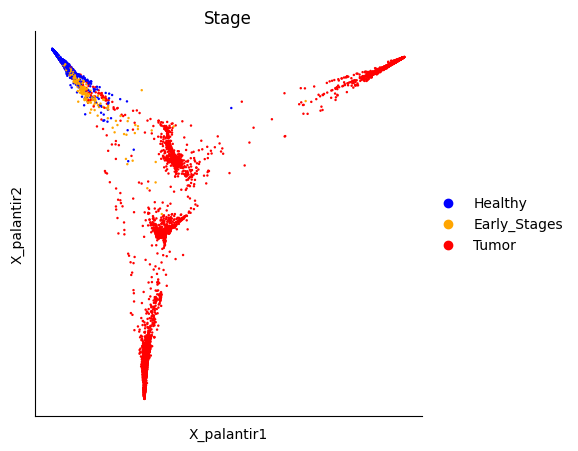

In [52]:
sc.pl.embedding(adata_epi, color = "Stade", basis = "X_palantir")
sc.pl.embedding(adata_epi, color = "Stage", basis = "X_palantir")

inferring a principal tree --> parameters used 
    300 principal points, sigma = 0.025, lambda = 200, metric = euclidean
    fitting:  41%|███████████▍                | 164/400 [00:05<00:08, 28.29it/s]
    converged
    finished (0:00:05) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


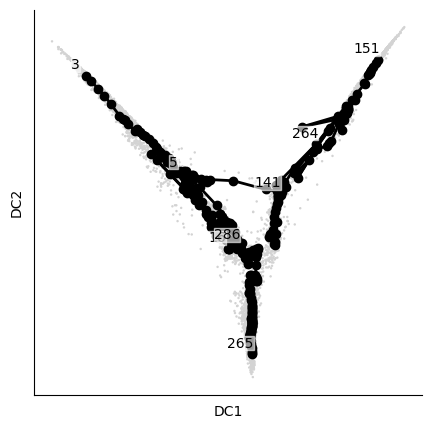

In [53]:
scf.tl.tree(adata_epi,method="ppt",Nodes=300,use_rep="palantir",
            device="cpu",seed=1,ppt_lambda=200,ppt_sigma=0.025,ppt_nsteps=400)


scf.pl.graph(adata_epi, basis = "diffmap")

In [54]:
# Choose root cells (normal tissue)
scf.tl.root(adata_epi, 265)

# Compute pseudotime
scf.tl.pseudotime(adata_epi)

node 265 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:06) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


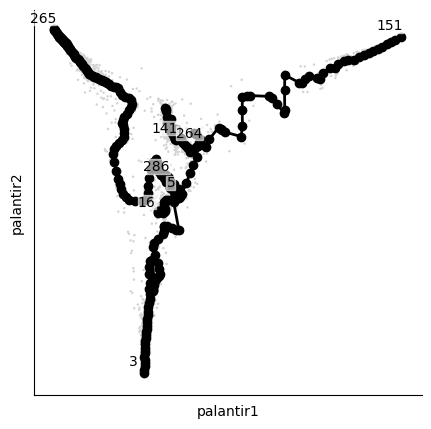

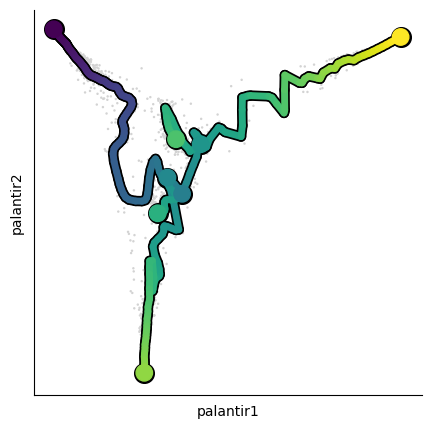

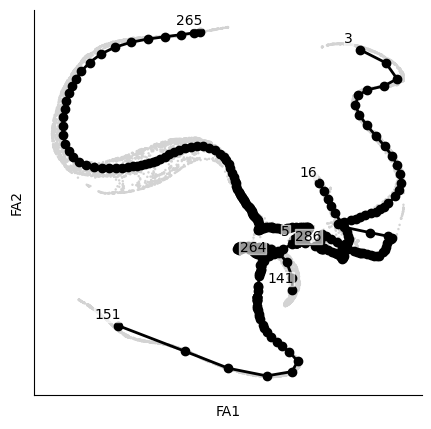

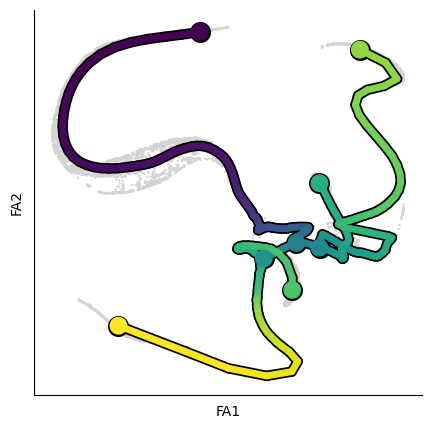

In [55]:
scf.pl.graph(adata_epi, basis =  "palantir")
scf.pl.trajectory(adata_epi, basis = "palantir")

scf.pl.graph(adata_epi, basis =  "draw_graph_fa")
scf.pl.trajectory(adata_epi, basis = "draw_graph_fa")

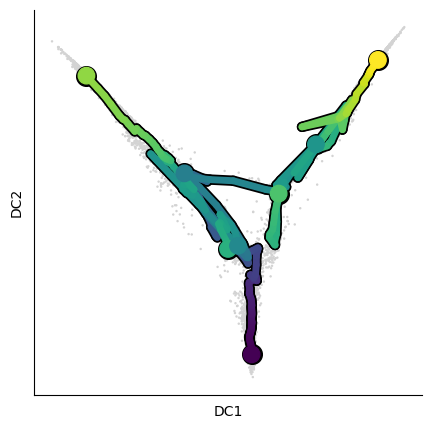

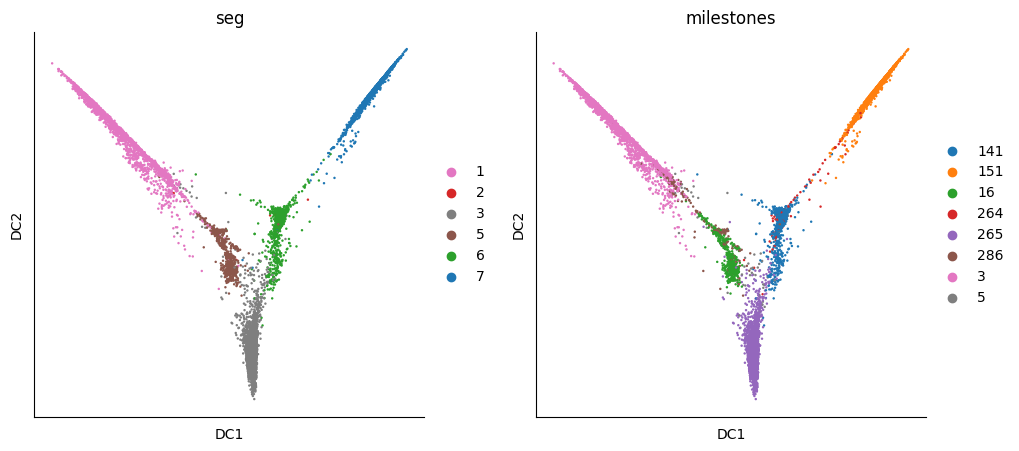

In [56]:
# Show plot
scf.pl.trajectory(adata_epi, basis = "diffmap")

sc.pl.diffmap(adata_epi,color=["seg","milestones"])

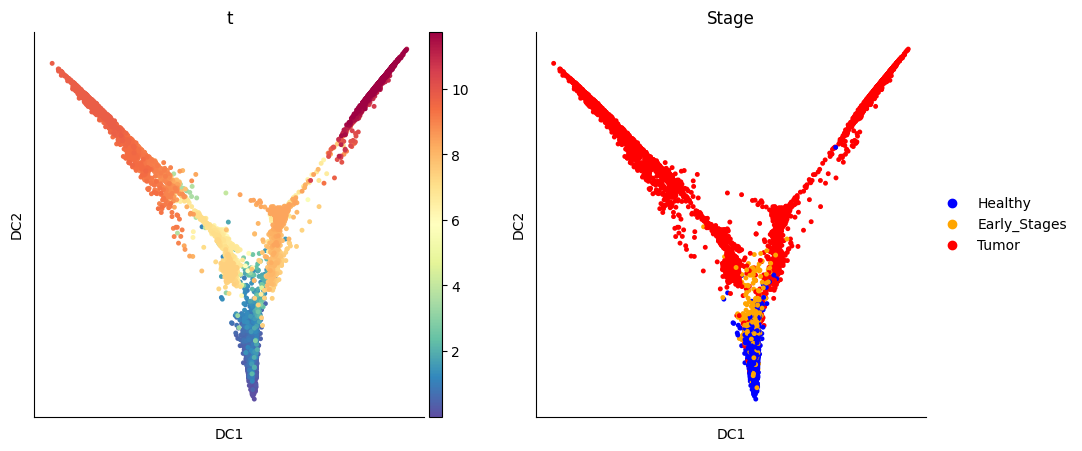

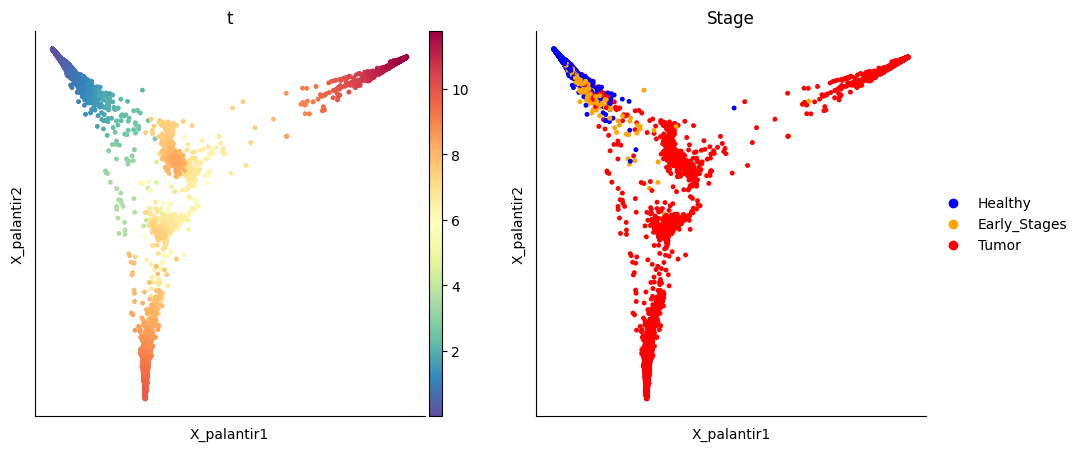

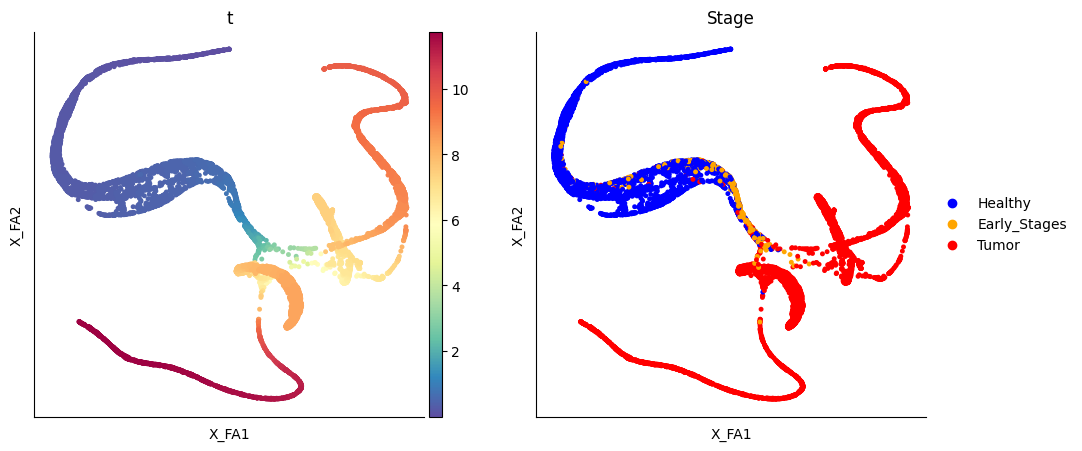

In [57]:
sc.pl.diffmap(adata_epi, color = ["t", "Stage"], size = 50)

sc.pl.embedding(adata_epi, color = ["t", "Stage"], size = 50, basis = "X_palantir")

sc.pl.embedding(adata_epi, color = ["t", "Stage"], size = 50, basis = "X_draw_graph_fa")

In [58]:
scf.tl.dendrogram(adata_epi)

Generating dendrogram of tree
    segment : 100%|███████████████████████████████| 6/6 [01:03<00:00, 10.64s/it]
    finished (0:01:03) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


In [59]:
# Changer les coordonnées pour enlever bug plot

df = pd.DataFrame(adata_epi.obsm['X_dendro'], index = adata_epi.obs.index, columns = ["x", "y"])
df.loc[df["x"] > 4.4, "x"] = df.loc[df["x"] > 4.4, "x"] + 1

adata_epi.obsm["X_dendro"] = np.array(df)

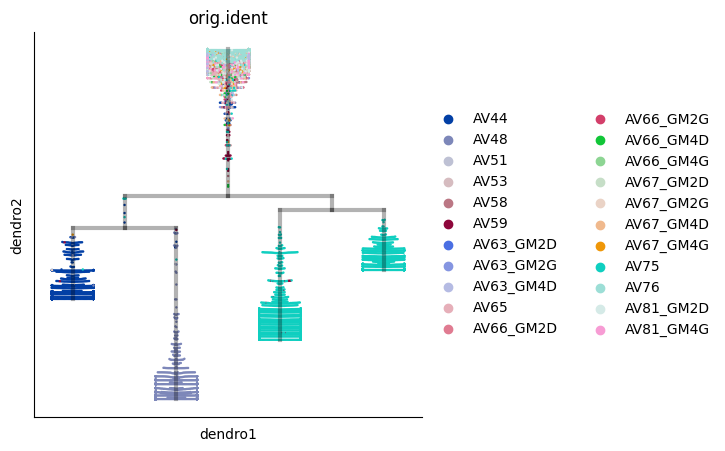

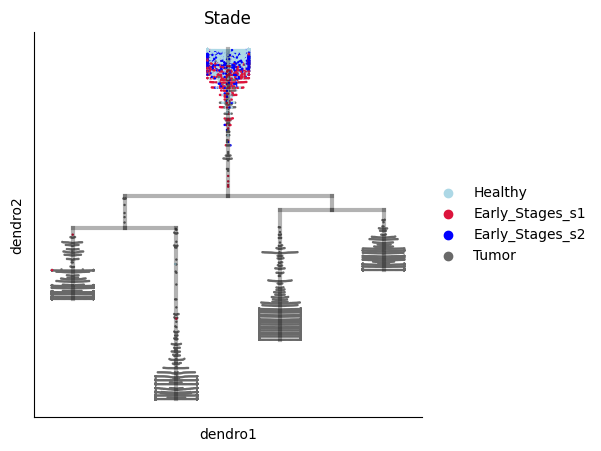

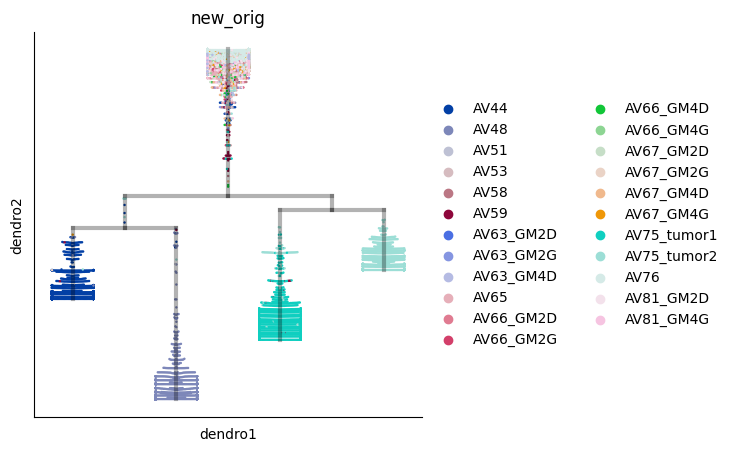

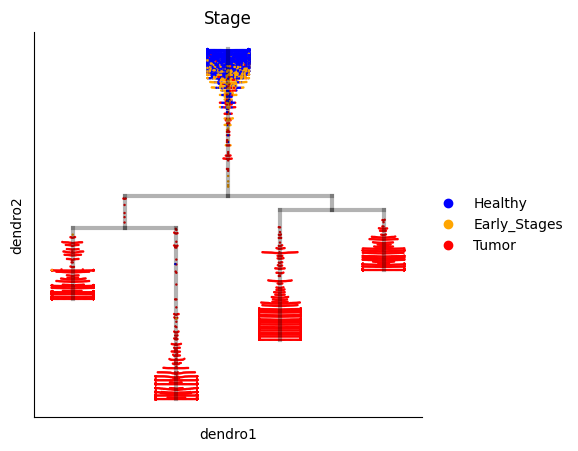

In [60]:
scf.pl.dendrogram(adata_epi,color="orig.ident")
scf.pl.dendrogram(adata_epi,color="Stade")
scf.pl.dendrogram(adata_epi,color="new_orig")
scf.pl.dendrogram(adata_epi,color="Stage")

(-4.0, 1.0)

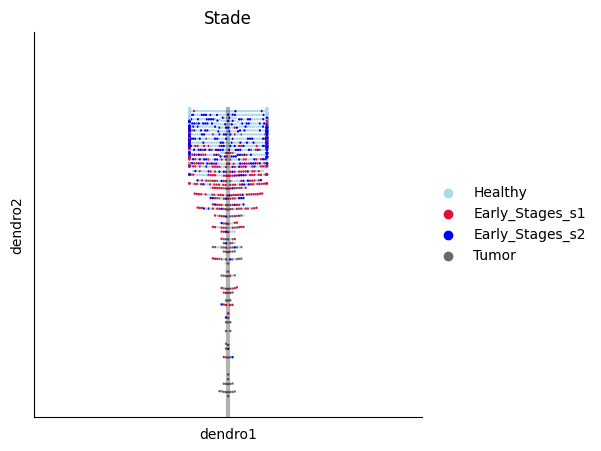

In [98]:
ax = scf.pl.dendrogram(adata_epi,color="Stade", show = False)
ax.set_xlim([1, 5])
ax.set_ylim([-4,1])

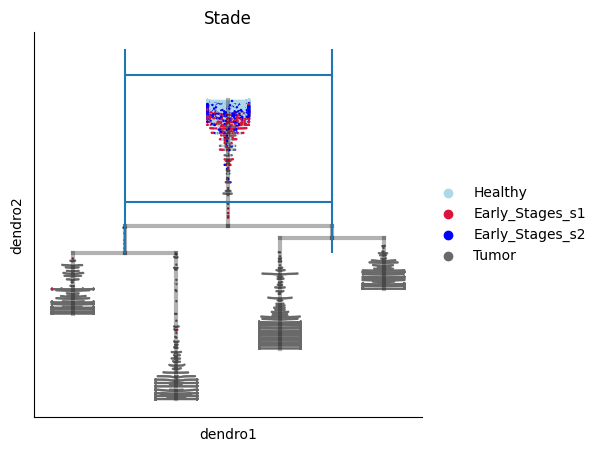

In [104]:
ax = scf.pl.dendrogram(adata_epi,color="Stade", show = False)
ax.vlines([1, 5] ,ymin = -6, ymax = 2)
ax.hlines([-4, 1] ,xmin = 1, xmax = 5)

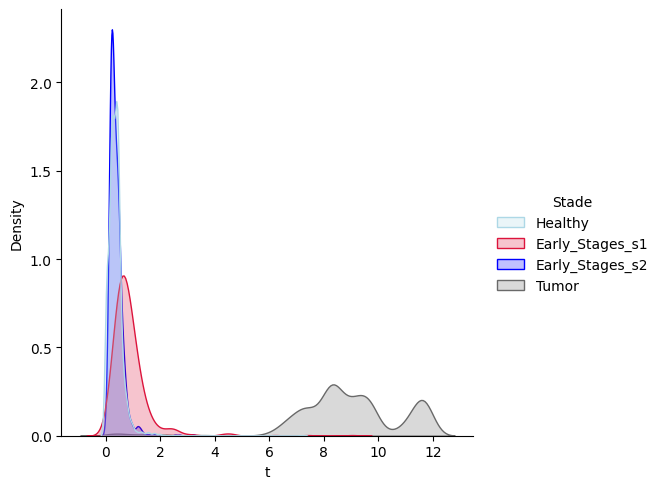

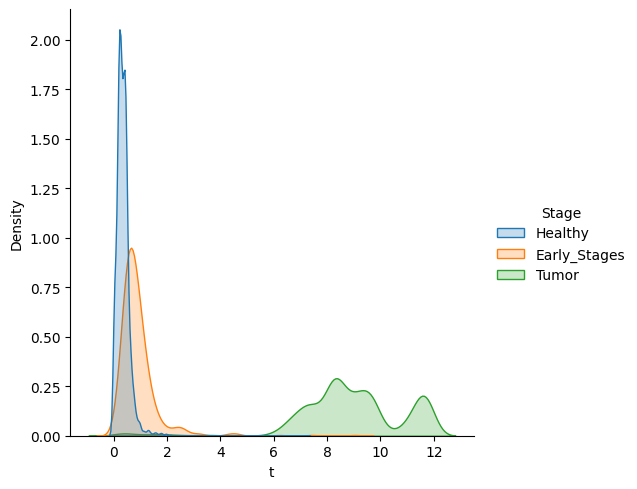

In [61]:
sns.displot(adata_epi.obs, x="t", hue = "Stade", kind = "kde", palette = stade_colors, fill = True, common_norm=False)
sns.displot(adata_epi.obs, x="t", hue = "Stage", kind = "kde", fill = True, common_norm=False)

In [62]:
adata_epi.obs[["Stage", "Stade"]].value_counts()

Stage         Stade          
Tumor         Tumor              5859
Healthy       Healthy            2364
              Early_Stages_s2     975
Early_Stages  Early_Stages_s1     376
              Early_Stages_s2      86
Healthy       Early_Stages_s1      71
Early_Stages  Healthy              12
dtype: int64

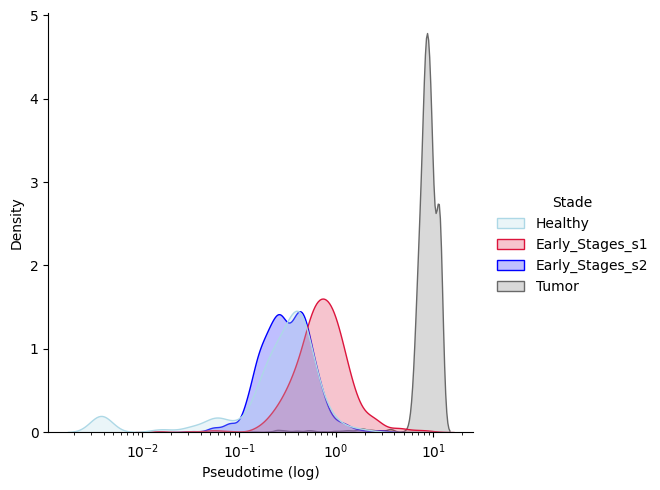

In [105]:
ax = sns.displot(adata_epi.obs, x="t", hue = "Stade", kind = "kde", palette = stade_colors, fill = True, common_norm=False, log_scale = True)

ax.set(xlabel="Pseudotime (log)")

<AxesSubplot: xlabel='Stade', ylabel='t'>

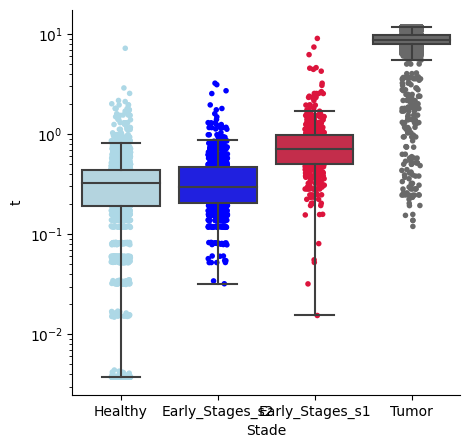

In [108]:
fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set(ylabel = "Pseudotime (log)")
sns.stripplot(adata_epi.obs, x="Stade", y="t", size=4, order=["Healthy", "Early_Stages_s2", "Early_Stages_s1", "Tumor"], palette = stade_colors, zorder=0)
sns.boxplot(adata_epi.obs, x = "Stade", y = "t", order=["Healthy", "Early_Stages_s2", "Early_Stages_s1", "Tumor"], palette = stade_colors, fliersize = 0)

In [342]:
from scipy.stats import ttest_ind, wilcoxon, mannwhitneyu, kruskal

es1 = adata_epi.obs.loc[adata_epi.obs["Stade"] == "Early_Stages_s1", "t"]
es2 = adata_epi.obs.loc[adata_epi.obs["Stade"] == "Early_Stages_s2", "t"]
h = adata_epi.obs.loc[adata_epi.obs["Stade"] == "Healthy", "t"]
T = adata_epi.obs.loc[adata_epi.obs["Stade"] == "Tumor", "t"]


print(f"S1 vs S2 : {mannwhitneyu(es1, es2)}")
print(f"S1 vs T : {mannwhitneyu(es1, T)}")
print(f"S1 vs h : {mannwhitneyu(es1, h)}")
print(f"h vs S2 : {mannwhitneyu(h, es2)}")


dico = {"S1": es1, "S2" : es2, "H" : h, "T" : T}
dico2 = {}
for i in dico.keys():
    dico2[i] = []
    for j in dico.keys():
        dico2[i].append(round(mannwhitneyu(dico[i], dico[j]).pvalue, 5))

matrix = pd.DataFrame(dico2, index = [i for i in dico.keys()])

matrix

S1 vs S2 : MannwhitneyuResult(statistic=399644.0, pvalue=2.6318099549133815e-98)
S1 vs T : MannwhitneyuResult(statistic=31735.0, pvalue=6.412596757077051e-260)
S1 vs h : MannwhitneyuResult(statistic=902458.0, pvalue=4.7493528618449477e-122)
h vs S2 : MannwhitneyuResult(statistic=1212732.0, pvalue=0.07569565443081275)


S1      S2       H    T
S1  1.0  0.0000  0.0000  0.0
S2  0.0  1.0000  0.0757  0.0
H   0.0  0.0757  1.0000  0.0
T   0.0  0.0000  0.0000  1.0

<AxesSubplot: xlabel='t', ylabel='Density'>

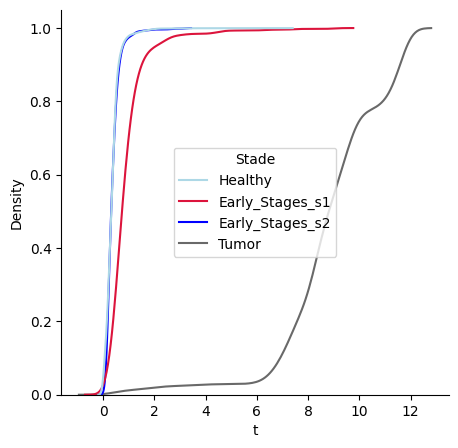

In [257]:
sns.kdeplot(adata_epi.obs, x = "t", hue = "Stade", common_norm = False, cumulative = True, palette = stade_colors)

(0.0, 3.0)

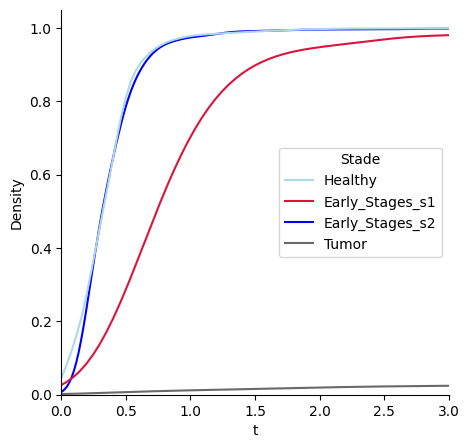

In [350]:
fig, ax = plt.subplots()
sns.kdeplot(adata_epi.obs, x = "t", hue = "Stade", common_norm = False, cumulative = True, palette = stade_colors, ax = ax)
ax.set_xlim(0, 3)



<AxesSubplot: xlabel='X_diffmap', ylabel='Y_diffmap'>

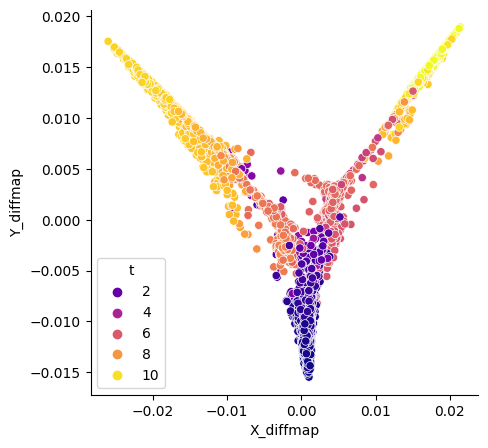

In [75]:
sns.scatterplot(adata_epi.obs, x = "X_diffmap", 
                y = "Y_diffmap", 
                hue = "t", 
               palette = "plasma")

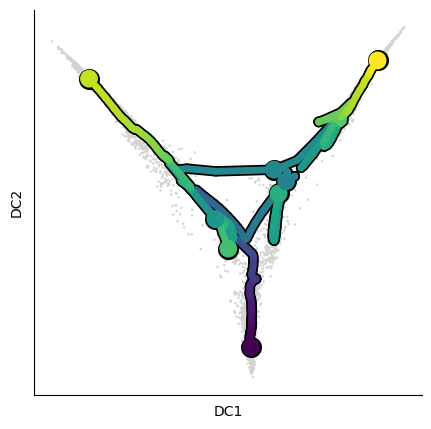

In [76]:
scf.pl.trajectory(adata_epi, basis = "diffmap")

## Test pyslinghsot

In [ ]:
import pyslingshot
from matplotlib import axes

In [ ]:
sc.pl.diffmap(adata_epi, color = "cnv_group")

In [ ]:
with open("../data/adata_epi_new_orig.pickle", "rb") as f1:
    a = pickle.load(f1)

In [ ]:
adata_epi.obs["new_orig"] = a.obs["new_orig"]

In [ ]:
adata_epi.obsm["X_diffmap_2d"] = adata_epi.obsm["X_diffmap"][:, :2]
adata_epi.obsm["X_diffmap_5d"] = adata_epi.obsm["X_diffmap"][:, :3]

sc.pp.neighbors(adata_epi, use_rep = "X_palantir")
sc.tl.louvain(adata_epi, resolution=0.2, key_added="louvain")
sc.pl.diffmap(adata_epi, color = "louvain", legend_loc = "on data")

# leiden, X_palantir et resolution = 0.15 donne 4 trajectoires pour 4 tumeurs mais les preneo ne se séparent pas sur l'histo

# Marche très bien X_diffmap2d, resolution = 0.15, louvain

In [ ]:
#adata_epi.obs["leiden"] = adata_epi.obs["leiden"].astype(int)
#adata_epi.obs["leiden"] = adata_epi.obs["leiden"].cat.as_ordered()

In [ ]:
adata_epi.obs["louvain"] = adata_epi.obs["louvain"].astype(int)

In [ ]:
slingshot = pyslingshot.Slingshot(adata_epi, celltype_key="louvain", obsm_key="X_diffmap", 
                                  start_node=1,
                                  debug_level='verbose')

In [ ]:
"""
sc.pl.diffmap(adata_epi, color = "new_orig", legend_loc = "on data")
adata_epi.obs["new_orig"] = pd.Categorical(adata_epi.obs["new_orig"]).as_ordered()
# Peut être essayer différents orig pour node de début

# Met un numéro correspondant à chaque new_orig

j = 0
dico = {}
for i in np.unique(adata_epi.obs["new_orig"]):
    dico[i] = j
    j +=1

liste = []

for i in adata_epi.obs["new_orig"]:
    liste.append(dico[i])

adata_epi.obs["new_orig_int"] = liste

adata_epi.obs["new_orig_int"] = pd.Categorical(adata_epi.obs["new_orig_int"]).as_ordered()

sc.pl.diffmap(adata_epi, color = "new_orig_int")
"""

In [ ]:


# Marche plutot bien


tumors = ["AV75_tumor1", "AV59", "AV75_tumor2", "AV44", "AV48"]

liste2 = [i if i in tumors else "non_tumor" for i in adata_epi.obs["new_orig"]]

adata_epi.obs["tumor_annot"] = liste2

"""
tumors = ["AV75_tumor1", "AV59", "AV75_tumor2", "AV44", "AV48"]

liste2 = [adata_epi.obs.loc[i, "new_orig"] if adata_epi.obs.loc[i, "new_orig"] in tumors else adata_epi.obs.loc[i, "Stade"] for i in adata_epi.obs.index]

adata_epi.obs["tumor_annot"] = liste2
"""

j = 0
dico2 = {}
for i in np.unique(liste2):
    dico2[i] = j
    j+=1

print(dico2)
liste = []

for i in adata_epi.obs["tumor_annot"]:
    liste.append(dico2[i])

adata_epi.obs["tumor_annot_int"] = liste

adata_epi.obs["tumor_annot_int"] = pd.Categorical(adata_epi.obs["tumor_annot_int"]).as_ordered()

sc.pl.diffmap(adata_epi, color = "tumor_annot_int", legend_loc = "on data")

In [ ]:
# Test New_orig

slingshot = pyslingshot.Slingshot(adata_epi, celltype_key="tumor_annot_int", obsm_key="X_diffmap", 
                                  start_node=5,
                                  debug_level='verbose')
                                  

In [ ]:
"""
slingshot = pyslingshot.Slingshot(adata_epi, celltype_key="louvain", obsm_key="X_diffmap", 
                                 start_node=6,
                                 debug_level='verbose')
"""

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

slingshot.fit(num_epochs=1, debug_axes=axes)

In [ ]:
first, last = slingshot.curves[0], slingshot.curves[-1]
liste = [first, last]

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('Clusters')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)

In [ ]:
# NOTE: the Slingshot class has a property which has the pseudotime that is used to 
# color the plot above
pseudotime = slingshot.unified_pseudotime

adata_epi.obs["louvain"] = adata_epi.obs["louvain"].astype("category")

In [ ]:
sc.pl.diffmap(adata_epi, color = "orig.ident", projection = "3d")
sc.pl.diffmap(adata_epi, color = "Stade", projection = "3d")
sc.pl.diffmap(adata_epi, color = "louvain", projection = "3d")

In [ ]:
sc.pl.diffmap(adata_epi, color = "orig.ident")
sc.pl.diffmap(adata_epi, color = "Stade")
sc.pl.diffmap(adata_epi, color = "louvain")

In [ ]:
adata_epi.obs["slinghsot_pt"] = pseudotime

In [ ]:
sc.pl.diffmap(adata_epi, color = "slinghsot_pt")

In [ ]:
sns.displot(adata_epi.obs, x="slinghsot_pt", hue = "Stade", kind = "kde", palette = stade_colors, fill = True, common_norm=False)

In [ ]:
sc.pl.diffmap(adata_epi, color = "slinghsot_pt", projection = "3d")
sc.pl.diffmap(adata_epi, color = "Stade", projection = "3d")

Tester slingshot sur adata_epi_H_ES

In [ ]:
adata_epi_H_ES.obsm["X_diffmap2d"] = adata_epi_H_ES.obsm["X_diffmap"][:,:2]

sc.pp.neighbors(adata_epi_H_ES, use_rep = "X_diffmap2d")
sc.tl.louvain(adata_epi_H_ES, resolution = 0.12)
sc.pl.diffmap(adata_epi_H_ES, color = "louvain", legend_loc = "on data")


In [ ]:
adata_epi_H_ES.obs["louvain"] = adata_epi_H_ES.obs["louvain"].astype(int)

slingshot = pyslingshot.Slingshot(adata_epi_H_ES, celltype_key="louvain", obsm_key="X_diffmap", 
                                  start_node=0,
                                  debug_level='verbose')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

slingshot.fit(num_epochs=1, debug_axes=axes)

In [ ]:
first, last = slingshot.curves[0], slingshot.curves[-1]
liste = [first, last]

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('Clusters')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)

In [ ]:
pseudotime = slingshot.unified_pseudotime

adata_epi_H_ES.obs["leiden"] = adata_epi_H_ES.obs["leiden"].astype("category")

adata_epi_H_ES.obs["slinghsot_pt"] = pseudotime

In [ ]:
sns.displot(adata_epi_H_ES.obs, x="slinghsot_pt", hue = "Stade", kind = "kde", palette = stade_colors, fill = True, common_norm=False)

In [ ]:
sc.pl.diffmap(adata_epi_H_ES, color = "slinghsot_pt")

In [ ]:
sc.pl.diffmap(adata_epi, color = "cnv_group")

In [ ]:
sc.pl.diffmap(adata_epi, color = "cnv_group", projection = "3d")

# Test

In [ ]:
adata_epi.obsm["X_diffmap_2d"] = adata_epi.obsm["X_diffmap"][:, :2]
adata_epi.obsm["X_diffmap_3d"] = adata_epi.obsm["X_diffmap"][:, :3]

sc.pp.neighbors(adata_epi, use_rep = "X_diffmap_3d")
sc.tl.louvain(adata_epi, resolution=0.2, key_added="louvain")
sc.pl.diffmap(adata_epi, color = "louvain", legend_loc = "on data")

# leiden, X_palantir et resolution = 0.15 donne 4 trajectoires pour 4 tumeurs mais les preneo ne se séparent pas sur l'histo

# Marche très bien X_diffmap2d, resolution = 0.15, louvain

In [ ]:
adata_epi.obs["louvain"] = adata_epi.obs["louvain"].astype(int)
slingshot = pyslingshot.Slingshot(adata_epi, celltype_key="louvain", obsm_key="X_diffmap", 
                                  start_node=1,
                                  debug_level='verbose')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

slingshot.fit(num_epochs=1, debug_axes=axes)

first, last = slingshot.curves[0], slingshot.curves[-1]
liste = [first, last]

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].set_title('Clusters')
axes[1].set_title('Pseudotime')
slingshot.plotter.curves(axes[0], slingshot.curves)
slingshot.plotter.clusters(axes[0], labels=np.arange(slingshot.num_clusters), s=4, alpha=0.5)
slingshot.plotter.clusters(axes[1], color_mode='pseudotime', s=5)

# NOTE: the Slingshot class has a property which has the pseudotime that is used to 
# color the plot above
pseudotime = slingshot.unified_pseudotime

adata_epi.obs["louvain"] = adata_epi.obs["louvain"].astype("category")


adata_epi.obs["slinghsot_pt"] = pseudotime

sns.displot(adata_epi.obs, x="slinghsot_pt", hue = "Stade", kind = "kde", palette = stade_colors, fill = True, common_norm=False)

In [ ]:
sc.pl.embedding(adata_epi, basis = "X_palantir", color = "Stade")